# Minha primeira rede Neural
### Parte I - Perceptron
### Parte II - Rede Neural Artificial simples

*Este material faz parte da [aula de Redes Neurais](https://edisciplinas.usp.br/pluginfile.php/6645068/mod_resource/content/2/RedesNeuraisArtificiais_ParteI.pdf) do curso PMR5251 - Avaliação do Comportamento Mecânico de Materiais Utilizando uma Abordagem de ML*

 ![](https://drive.google.com/uc?export=view&id=1ER1VxvXSNbu7I2-YJDqvA_vJE-Fmtcgg)



<a class="anchor" id="0"></a>
## Sumário
Introdução

Referências
    
Pacotes


### Parte I - Perceptron
1.	Modelo do Perceptron

2. Função Erro e Função custo

2. Funções particularizadas para o Perceptron a ser implementado

2.  Algoritmo do processo de treinamento

3.  Exemplo 1: Classificação com valores sintéticos

4.  Exemplo 02: Classificação e análise de performance


### Parte II - Rede Neural Artificial simples
1.   Estrutura das RNAs

2.   Dados - Noisy Moon

3.   Codificação da RNA

    3.1. Definição da estrutura da RNA
    
    3.2. Inicialização dos parâmetros
    
    3.3. Propagação para frente, função de custo e retro-propagação   
    
    3.4. Atualização dos parâmetros

    3.5. Integração das tarefas 3.1 a 3.4 na função rna()       
    

4.   Treinamento e teste da RNA

    4.1. Previsão das saídas
    
    4.2. Treinamento da RNA 
    
    4.3. Resultados
    
    4.4. Ajuste do número de neurônios da camada escondida
    
    4.5 Desempenho com outros padrões de dados

## Introdução <a class="anchor" id="0.1"></a>

O objetivo deste Notebook é fornecer uma breve teoria e ferramentas computacionais básicas para a construção passo a passo de uma rede neural simples. A parte I trata do perceptron e a parte II extrapola para uma Rede Neural Artificial (RNA) simples.

RNAs são sistemas computacionais *vagamente* inspirados nas redes neurais biológicas que constituem os cérebros dos animais. Esses sistemas *aprendem* a realizar tarefas considerando exemplos, geralmente sem serem programados com quaisquer regras específicas de tarefas.


![](https://drive.google.com/uc?export=view&id=1oOYpdfeAByqCcARySHI1C0u4QCREhGGJ)

O neurônio é a unidade básica de computação no cérebro. Nosso cérebro tem, em média, 86 bilhões de neurônios e centenas de bilhões de conexões entre eles, formando uma enorme rede de comunicação, a rede neural. Cada neurônio possui um corpo central, diversos dendritos e um axônio. Os dendritos formam a superfície de entrada do neurônio e o axônio a superfície de saída do *fluxo de informação* (esse fluxo de informação é importante para compreender o neurônio matemático daqui a pouco).


![](https://drive.google.com/uc?export=view&id=1yae_skefVt-_EXVQHcRfD2J7fKtp-9R8)

As informações transmitidas pelos neurônios são impulsos elétricos. Os dendritos recebem esses pulsos elétricos de outros neurônios através das sinapses, definidas como o ponto de contato entre a terminação axônica de um neurônio e o dendrito de outro. É pelas sinapses que os neurônios se unem funcionalmente, formando as __redes neurais__. As sinapses funcionam como válvulas, sendo capazes de controlar a transmissão de impulsos, isto é, o fluxo da informação entre os neurônios na rede neural. O efeito das sinapses é variável e é esta variação que dá ao neurônio capacidade de adaptação.

O corpo celular processa a informação e, se esses sinais forem superiores a um limiar (threshold), seguem pelo axônio e atingem os dendritos dos neurônios seguintes.. Caso contrário, são bloqueados e não prosseguem (são considerados irrelevantes). A passagem desses sinais não é elétrica, mas química (através da substância serotonina). Estamos falando aqui do neurônio biológico e preste bastante atenção a palavra *threshold*, pois ela é a essência do neurônio matemático.

![](https://drive.google.com/uc?export=view&id=1QtEHrYZDzfMetKgVBd-SjX9HlQENAd_o)

## Em poucas palavras...

Em poucas palavras, a rede neural é uma grande função que mapeia um conjunto de dados de entrada $\mathbf{x}^{(i)} \in \mathbf{X}$ para o valor alvo desejado $y^{(i)} \in \mathbf{Y}$. Os dados de entrada são definidos pela matriz $\mathbf{X} \in {\rm I\!R}^{{n_x},m}$, onde $n_x$ é o número de *features* do problema (número de entradas de cada exemplo) e $m$ é o número de dados disponíveis (número total de exemplos de treinamento). Os dados de saída são definidos por $\mathbf{Y}\in {\rm I\!R}^{{n_y},m}$, onde $n_y$ é o número de saídas da RNA. 

Para uma RNA ser capaz de mapear o problema, seja classificação ou regressão, ela precisa ser treinada. O *aprendizado supervisionado* de uma RNA exige, inicialmente, um conjunto de dados rotulados ou classificados. Durante o aprendizado as saídas geradas pela RNA são comparadas com as saídas desejadas e as diferenças entre elas são usadas para o treinamento.

Primeiramente, define-se uma hipótese, $h_w(\mathbf{x}^{(i)})=\hat{y}^{(i)}$, que modela matematicamente o valor alvo $y_i$, através de uma ponderação dos dados de entrada $\mathbf{x}^{(i)}$, ou de uma combinação entre eles. 

Como encontrar essas ponderações? Os algoritmos de treinamento supervisionado das RNAs consistem de métodos de otimização de uma função de custo $J$ (em inglês, *loss function* ou *cost function*). O processo de otimização tem como objetivo calcular os parâmetros da rede (matrizes de pesos das ligações $\mathbf{w}^l$ para todas as camadas da RNA, ou seja, $l = 1,...,L$) de forma a minimizar a função de custo.

Assim, no treinamento supervisionado (caso que estamos tratando aqui) é necessário definir uma função de custo baseada no problema que se quer resolver. Essa função depende da diferença entre a saída desejada e a saída calculada pela RNA para cada exemplo usado no treinamento.  

Existem diversas funções de custo. Para problemas mais comuns, tais como, classificação, já existem funções de custo pré-estabelecidas.

Uma vez definida a função de custo, o treinamento é feito usando gradiente descendente (também conhecido como retropropagação - do inglês, *backpropagation*), que compreende duas etapas: calcular gradientes da função de custo e, em seguida, atualizar os parâmetros existentes em resposta aos gradientes, que é como a descida é feita.

Este ciclo se repete até atingir os mínimos da função de custo. Esse processo de aprendizagem pode ser descrito por uma equação bastante simples: 
\begin{equation}
w_{k,j+1} = w_{k,j} - {\nabla J(w_{k,j})}.
\end{equation}
onde $w_k$ é $k-$ésimo peso, $j, j+1$ são as iterações, $J$ é a função custo e $\nabla J(w_{k,j})$ é seu gradiente com relação ao peso $w_{k,j}$.

![](https://drive.google.com/uc?export=view&id=1IIg-3a9fi4V7GabYVS5pepP6IsCi7bhy)

Vamos iniciar com o estudo do *Perceptron*. Perceptron é o elemento fundamental de todas as redes neurais, e, portanto, seu entendimento claro é, com certeza, imprescindível antes de entrar em teorias mais complexas.

Portanto, vamos entender e programar um perceptron e depois extrapolar nosso conhecimento para uma RNA.





## Referências<a class="anchor" id="0.2"></a>
Os notebooks são baseados nas seguintes fontes (listadas por ordem de importância):

1. Jason Brownlee, [How to Code a Neural Network with Backpropagation In Python (from scratch)](https://machinelearningmastery.com/implement-backpropagation-algorithm-scratch-python/), 2019.
4. Sebastian Raschka, [Single-Layer Neural Networks and Gradient Descent](https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html),2015.
2.  Data Science Academy, [Deep Learning Book](http://deeplearningbook.com.br/), especialmente Capítulos [6](http://deeplearningbook.com.br/o-perceptron-parte-1/) e [7](
http://deeplearningbook.com.br/o-perceptron-parte-2/), em português.
3. Matt Mazur, [Neural Network with Backpropagation](https://github.com/mattm/simple-neural-network/blob/master/neural-network.py), 2015.
5. Adam Harley [Demystifying Deep Convolutional Neural Networks](http://scs.ryerson.ca/~aharley/neural-networks/)
6. Bernd Klein, [Simple Neural Networks](https://www.python-course.eu/simple_neural_network.php),2020.
7. Casper Hansen [Neural Networks: Feedforward and Backpropagation Explained & Optimization
](https://mlfromscratch.com/neural-networks-explained/#/), 2019.

## Pacotes<a class="anchor" id="0.3"></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.datasets
from matplotlib.colors import NoNorm

np.random.seed(1) # define uma semente para geração de números aleatórios
import seaborn
seaborn.set_style('darkgrid', {'legend.frameon':True})
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#Parte I: Perceptron

## 1. Modelo do Perceptron<a class="anchor" id="1"></a>

O modelo mais simples, e bastante antigo, que serviu de base e inspiração para teoria de RNAs é o **Perceptron**, um classificador linear usado para previsões binárias. Foi inventado em 1958 por Frank Rosenblatt no Cornell Aeronautical Laboratory. **Isso significa que, para que funcione, os dados devem ser linearmente separáveis.** 

![](https://drive.google.com/uc?export=view&id=1O3qCWCZ93wDLiscOg9KGC5JamHir0m2L)

Na figura temos, nos neurônios de entrada, os valores dos dados da entrada $i$,
$$
\mathbf{x}^{(i)}=\begin{bmatrix} x_1\\ x_2\\ \vdots \\ x_{n_x} \end{bmatrix}
$$
que possuem os respectivos pesos,
$$
\mathbf{w}=\begin{bmatrix}  w_1\\ w_2\\ \vdots \\ w_{n_x} \end{bmatrix}
$$
além do *bias*, $b$, que move o contorno de decisão para fora da origem.

Então, o *estado de um neurônio*, $z^{(i)}$, é definido por uma única expressão através da soma ponderada das entradas, dentro do neurônio intermediário:
$$
z^{(i)} = w_1x_{1} + \dots + w_{n_x}x_{n_x} + b = \sum_{j=1}^{n_x} x_{j}^{(i)}w_{j} +b = \mathbf{w}^T\mathbf{x}^{(i)}+b
$$
portanto, a equação de $z^{(i)}$ acima define o *contorno de decisão* do classificador, que é um hiperplano de dimensão $n_x$. 

A função de ativação $a^{(i)}$, ainda no neurônio intermediário, 
$$
a^{(i)} = g(z^{(i)}) 
$$

O objetivo da função de ativação é introduzir não linearidade na saída de um neurônio. Veja na figura abaixo as funções de ativação mais comumente utilizadas.

![](https://drive.google.com/uc?export=view&id=1TJC6yZ75hXB1Lnjl9Hs1yiJLiW2wmEzh)

Essa não linearidade é um dos fatores que afetam nossos resultados e a precisão do nosso modelo. No caso de usarmos Redes Neurais com várias camadas ocultas, uma função de ativação linear simplesmente irá gerar uma série de transformações afins portanto, podemos muito bem não ter nenhuma camada oculta. 

Assim, esse modelo não é mais expressivo do que um simples modelo de regressão logística padrão. A menos que transmitamos não linearidade, não estamos computando modelos interessantes, mesmo se nos aprofundarmos nas redes neurais.

Na definição do perceptron, onde há somente uma camada, a nossa hipótese para tomada de decisão é dada pela ativação $a^{(i)}$
$$
\hat{y}^{(i)} =a^{(i)}
$$

A nossa hipótese (saída) $\hat{y}_i$,  já definida anteriormente, representa a previsão do algoritmo para o conjunto de entradas $\mathbf{x}_i$ e a saída real $y_i$.

Por exemplo, se tivessemos somente uma entrada $x=x^{(i)}=x_1^{(i)}$, a saída $\hat{y}_i$ seria dada por
$$ \hat{y}^{(i)} = g(x w_1 + b) $$

$$ a^{(i)} = g(x w_1 + b) $$

Desse modo, supondo que $z=x w_1 + b=0.2$, então, dada uma função de ativação qualquer, suponha que $\hat{y}=g(0.2)=1$. Perceba que são duas incógnitas $(w_1, b)$ e uma equação, gerando uma infinidade de resultados possíveis. Qual resultados iremos escolher? Ou, ainda, escolhendo valores aleatórios para os parâmetros $(w_1, b)$, qual a chance de conseguirmos uma rede que dê resultados satisfatórios?

A rede deve ser *treinada*. E é o treinamento que irá nos mostrar qual a melhor opção de parâmetros a serem utilizados (pesos das ligações e vieses dos neurônios).




## 2. Função Erro e Função custo<a class="anchor" id="2"></a>

O objetivo de treinar uma RNA é calcular os seus parâmetros de forma a minimizar uma função de custo. A **função de custo** é baseada em uma **função do erro** entre a saída desejada e a saída calculada pela RNA para cada exemplo utilizado
no treinamento. Existem inúmeras funções de erro, sendo que as duas mais comuns são:
* Erro quadrático
$$
E(\hat{\mathbf{y}}^{(i)},{\mathbf{y}}^{(i)})=\sum\limits_{j=1}^{n_y} \left(\hat{y}^{(i)}_j -{y}^{(i)}_j\right)^2= \left\|\hat{\mathbf{y}}^{(i)} - {\mathbf{y}}^{(i)} \right\|_2^2
$$
* Função logística
$$
L(\hat{\mathbf{y}}^{(i)},{\mathbf{y}}^{(i)})=-{y}^{(i)} \log{\hat{y}^{(i)}}-\left(1-{y}^{(i)}\right)\log{\left(1-\hat{y}^{(i)}\right)}
$$

A escolha da função de erro depende do tipo de problema que se deseja resolver. A função erro quadrático é mais utilizada para problemas de ajuste de funções e a função logística para problemas de classificação binária. *Ressalta-se que a função de erro tem que ter derivada contínua em relação aos parâmetros da RNA e poder ser aplicada para cada exemplo de treinamento individualmente.*

para as funções de erro mostradas anteriormente, as respectivas funções de custo são,
$$
J\left(\mathbf{W},\mathbf{B}\right)={1\over m}\sum\limits_{i=1}^{m}E(\hat{\mathbf{y}}^{(i)},{\mathbf{y}}^{(i)}) = {1\over m}\sum\limits_{i=1}^{m}\sum\limits_{j=1}^{n_y} \left(\hat{y}^{(i)}_j -{y}^{(i)}_j\right)^2 = {1\over m} \sum\limits_{i=1}^{m}\left\|\hat{\mathbf{y}}^{(i)} - {\mathbf{y}}^{(i)} \right\|_2^2
$$
e
$$
J\left(\mathbf{W},\mathbf{B}\right)={1\over m}\sum\limits_{i=1}^{m} L(\hat{\mathbf{y}}^{(i)},{\mathbf{y}}^{(i)}) = {1\over m}\sum\limits_{i=1}^{m} -{y}^{(i)} \log{\hat{y}^{(i)}}-\left(1-{y}^{(i)}\right)\log{\left(1-\hat{y}^{(i)}\right)}
$$
onde $\mathbf{W}$ e $\mathbf{B}$ representam compactamente todos os parâmetros da RNA.



## 3. Funções particularizadas para o Perceptron a ser implementado <a class="anchor" id="3"></a>

### Função de ativação

A função de ativação $a^{(i)}$, ainda no neurônio intermediário, 
$$
a^{(i)} = g(z^{(i)}) = {\text{sign}} \left[\mathbf{w}^T\mathbf{x}^{(i)} + b \right] 
$$
onde $\text{sign}\left[\bullet\right]$ refere-se ao sinal de $\bullet$. Portanto, perceba que foi utilizada como *função de ativação* a função degrau, 

\begin{equation}
   g(z^{(i)}) = \left\{ \begin{matrix}\ 1 &  z^{(i)} \ge 0\\
    -1 &  z^{(i)} < 0.\end{matrix} \right.
\end{equation}

Na definição do perceptron, onde há somente uma camada, a nossa hipótese para tomada de decisão é dada pela ativação $a^{(i)}$
$$
\hat{y}^{(i)} =a^{(i)}
$$


### Função erro e custo 

Na classificação binária, $\hat{y}_i$ e $y_i$ pode assumir valores $\pm 1$ (sim ou não, positivo ou negativo, benigno ou não benigno, etc...).

Nesse caso, pode-se utilizar as funções de custo *0-1* ou *Hinge*, que são versões simplificadas da função custo com função logística de erro. A função *Hinge* é a última mais utilizada, por ser parcialmente diferenciável.

A função de erro é dada por,
$$
E_{01} = \max\{0,-y^{(i)}\hat{y}^{(i)}\}= 
\begin{cases}
    0,& \text{se } -y^{(i)}\hat{y}^{(i)}\geq 0\\
    -y^{(i)}\hat{y}^{(i)}, & \text{se } -y^{(i)}\hat{y}^{(i)} > 0
\end{cases}
$$

A função de custo conhecida como *0-1* é definida como,
$$
J_{01}(\mathbf{w},b)= \sum\limits_{i=1}^m\max\left\{0,-y^{(i)}\hat{y}^{(i)}\right\} 
$$


Sabendo-se que $\hat{y}^{(i)}$ pode assumir valores $\pm 1$, se a decisão estiver correta,
* $y^{(i)}=+1$ e $\hat{y}^{(i)}=+1$ forem positivos, $ y^{(i)}\hat{y}^{(i)}=+1$
* $y^{(i)}=-1$ e $\hat{y}^{(i)}=-1$ forem negativos, $ y^{(i)}\hat{y_i}=+1$

Em ambos os casos, $ y^{(i)}\hat{y}^{(i)}=+1$, e, portanto, o $\max\{0,-y^{(i)}\hat{y}^{(i)}\}$ é $0$.

Por outro lado, se a decisão estiver errada,
* $y^{(i)}=+1$ e $\hat{y}^{(i)}=-1$, então $ y^{(i)}\hat{y}^{(i)}=-1$
* $y^{(i)}=-1$ e $\hat{y}^{(i)}=+1$, então $ y^{(i)}\hat{y}^{(i)}=-1$

Em ambos os casos, $ y^{(i)}\hat{y}^{(i)}=-1$, e, portanto, o $\max\{0,-y^{(i)}\hat{y}^{(i)}\}$ é $+1$.

Veja que, nesse caso, a derivada da função custo, necessária para o algoritmo de gradiente descendente, é nula em qualquer valor, exceto no $0$. Isso forçaria todo o gradiente a ser $0$ e os pesos nunca seriam atualizados. O modelo perceptron nunca aprenderia.

Existe uma opção menos restritiva de função erro, conhecida como *Hinge*, definida como:
$$
E_h= \max\{0,1-m^{(i)}\} = \begin{cases}      
y^{(i)}\ z^{(i)} &\text{if } y^{(i)}\ \mathbf{x}^{(i)}\cdot \mathbf{w} < 1 \\
0&\text{if } \ y^{(i)}\ \mathbf{x}^{(i)}\cdot \mathbf{w} > 1      
\end{cases}
$$
onde
$$
m^{(i)}= \mathbf{x}^{(i)}\cdot \mathbf{w}+b=y^{(i)}z^{(i)}
$$

Verifica-se que $m^{(i)} \le 0$ representa a *margem de segurança* da previsão correta e $z^{(i)}$ é o estado do neurônio.

A função de custo, chamada $J_h$, é dada por,
$$
J_h(\mathbf{w},b,\mathbf{y})= \sum\limits_{i=1}^{n_x}\max\{0,1-m^{(i)}\} 
$$

Nesse caso, sabe-se que $z^{(i)}$ pode assumir valores positivos e negativos. Se a decisão estiver correta,
* $y^{(i)}=+1$ e $z^{(i)}>0$, então $ m^{(i)}>0$
* $y^{(i)}=-1$ e $z^{(i)}<0$, então $ m^{(i)}>0$

Em ambos os casos, $ m^{(i)}>0$. Porém, $\max\{0,1-m^{(i)}\}$ é $0$ somente para $m^{(i)} \ge 1$; para $m^{(i)} < 1$, a solução correta está com uma *margem pequena*  $m^{(i)}$ e, portanto, a função de  custo será penalizada.

Por outro lado, se a decisão estiver errada,
* $y^{(i)}=+1$ e $z^{(i)}<0$, então $ m^{(i)}<0$
* $y^{(i)}=-1$ e $z^{(i)}>0$, então $ m^{(i)}<0$

Em ambos os casos, $m^{(i)}<0$, e, portanto, $\max\{0,1-m^{(i)}\}$ é $1-m^{(i)}>0$.

Veja, no código abaixo, a ilustração das duas funções de custo.

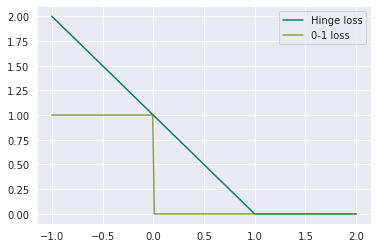

In [ ]:
xmin, xmax = -1, 2
m_i = np.linspace(xmin, xmax, 200)
plt.plot(m_i, np.where(m_i < 1, 1- m_i, 0), color = 'teal',label="Hinge loss")
plt.plot(m_i,np.where(m_i < 0, 1, 0), alpha = 0.8, color = 'olivedrab',label="0-1 loss")
plt.legend()

## 4. Algoritmo do processo de treinamento<a class="anchor" id="4"></a>

Quando treinamos um perceptron, fazemos alterações nos pesos iterativamente até encontrarmos o melhor conjunto de pesos para representar a separação linear entre os dados. 

1. Inicializa-se os pesos $\mathbf{w}=\mathbf{0}$ ou valores pequenos randômicos;
2. Execução da RNA para todos os exemplos de treinamento $n_E$ (número de épocas) vezes. E para cada $k=1,2,\cdots,n_E$,

> Para cada exemplo $i$ de seu conjunto de dados de treinamento $\mathbf{X}$, 
>>\- Calcula-se o estado 
$$
z^{(i)}_k=1 b^{(i)}_k + x^{(i)}_1 w_{k,1} + x^{(i)}_2 w_{k,2} + \cdots + x^{(i)}_{n_x} w_{k,n_x}
$$
>>\- Cálculo dos erros entre as saídas desejadas e as previstas pela RNA, computando a função de custo,
\begin{align}
E_{h,k}^{(i)} &= \max\{0,-y^{(i)}z^{(i)}_k\}\\
J_{h,k} &+= E_{h,k}^{(i)}
\end{align}

> Atualização dos parâmetros da RNA,
\begin{align}
b_{k+1} &= b_{k} + \Delta b_{k}\\
w_{j,k+1} &= w_{j,k} + \Delta w_{j,k}
\end{align}
para todas as *features* $0 \le j \le n_x$.

Faltou entender como atualizamos os pesos. Isto é, como calculamos $\Delta w_{j,k}$ e $\Delta b_{k}$? Você conhece o método do gradiente descendente? Caso não conheça, busque informações e aprenda mais profundamente, pois é um método de otimização muito importante em aprendizado de máquinas.

Para fazer isso, precisamos dos gradientes da função custo. O gradiente de uma função é o vetor de suas derivadas parciais. Portanto,
\begin{align}
\Delta w_{j,k} &= - \alpha \frac{\partial J_{h,k}}{\partial w_{j,k}} = \alpha y^{(i)}x_j^{(i)} \\
\Delta b_{k} &= - \alpha \frac{\partial J_{h,k}}{\partial b_{k}} = \alpha y^{(i)}
\end{align}

A derivada parcial apresentada na equação acima pode ser derivada mais facilmente através da regra da cadeia, 
$$
\frac{\partial J_{h,k}}{\partial w_{j,k}}=
\sum\limits_{i=1}^{m}\frac{\partial E(\hat{y}^{(i)},y^{(i)})}{\partial w_{j,k}} = \sum\limits_{i=1}^{m}\frac{\partial E(\hat{\mathbf{y}}^{(i)},{\mathbf{y}}^{(i)})}{\partial z_{k}^{(i)}}\frac{\partial z_{k}^{(i)}}{\partial w_{j,k}}
$$
e
$$
\frac{\partial J_{h,k}}{\partial b_{k}}=
\sum\limits_{i=1}^{m}\frac{\partial E(\hat{y}^{(i)},y^{(i)})}{\partial b_{k}} = \sum\limits_{i=1}^{m}\frac{\partial E(\hat{\mathbf{y}}^{(i)},{\mathbf{y}}^{(i)})}{\partial z_{k}^{(i)}}\frac{\partial z_{k}^{(i)}}{\partial b_{k}}
$$
Sabe-se que,
$$
\frac{\partial z_{k}^{(i)}}{\partial w_{j,k}}=x_j^{(i)} \qquad \frac{\partial z_{k}^{(i)}}{\partial b_{k}}=1
$$

Para a função custo,
$$
\frac{\partial E(\hat{\mathbf{y}}^{(i)},{\mathbf{y}}^{(i)})}{\partial z_{k}^{(i)}} =
\begin{cases}      
-y^{(i)} &\text{se } m^{(i)} \leq 1 \\
0& \text{se } m^{(i)} > 1      
\end{cases}
$$

Lembre-se que $\alpha$ é a taxa de aprendizado (do inglês, *learning rate*). Se $\alpha = 1$ os pesos mudam muito sempre que há uma resposta errada. Como consequência, tem-se uma rede instável, que dificilmente se estabiliza. Se $\alpha$ for muito pequeno os pesos não mudam significativamente em cada etapa e a rede leva muito tempo para aprender. Normalmente escolha $0.1 \le \alpha \le 0.4$

Vamos implementar!!!



## 5. Exemplo 1: Classificação com valores sintéticos<a class="anchor" id="5"></a>

Uma variável binária valendo 0 ou 1 (calma, iremos mudar para $\pm 1$ para coincidir com nosso algoritmo) é sorteada sobre os pontos no plano $x_1,x_2$ com probabilidade dada por:

\begin{equation}
p(z=1|x_1,x_2) = \frac{1}{1+e^{-(x_1+0.5x_2-6)}}
\end{equation}

A seguir, um dataset de 500 dados é gerado. A variável de saída `y` é binária, 0 ou 1, e está associada ao conjunto de dados de entrada `x` que contém os valores de `x1` e `x2` dentro dos intervalos $x_1 \in [0,10], \, x_2 \in [0,10]$.

[[1.02293151 0.49018699]]
[-6.05142781]


Text(0, 0.5, 'x_2')

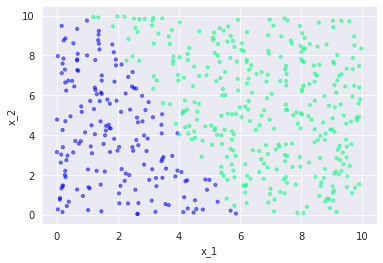

In [ ]:
from sklearn.linear_model import LogisticRegression

x1 = np.random.uniform(0, 10, size=500)
x2 = np.random.uniform(0, 10, size=500)
linear = x1+0.5*x2-6
p = 1/(1+np.exp(-linear))
z = np.random.binomial(n=1, p=p)
x = np.array([x1,x2]).T
modelo = LogisticRegression().fit(x, z)
y = modelo.predict(x)
print(modelo.coef_) # mostra uma matriz de todos os coeficientes (w1 e w2, ou tantos ws quanto o seu modelo possui)
print(modelo.intercept_)  #mostra o valor do bias, b 
plt.scatter(x1,x2,c= y, cmap='winter', alpha=0.5, s=10)
plt.xlabel(r'x_1')
plt.ylabel(r'x_2')

Agora, preparamos os dados inserindo uma última coluna para o *bias*, que iniciamos em $1$. Além disso, os dados de saída estão entre $0$ ou $1$ e fizemos nosso algoritmo para valores entre $-1$ e $1$. Para nossa facilidade, vamos mudar os dados de saída.

Veja que a implementação de gradiente descendente estocástico. Você lembra o que é isso? 
Se você não lembra das definições de *(Batch) gradient descent algorithm*, *Mini batch* (mini-lotes), *epoch* (épocas), *Stochastic Gradient descent*... Está na hora de rever nossa aula. Este [link](https://towardsdatascience.com/gradient-descent-algorithm-and-its-variants-10f652806a3) também pode ser útil. Neste [link](https://matheusfacure.github.io/2017/02/20/MQO-Gradiente-Descendente/) o assunto está muito bem explorado, e está em português.

In [ ]:
X = np.insert(x, 2, values=1, axis=1) # Inserimos bias antes da coluna 2
Y = np.where(y==0, -1, y) # Substituímos o valor 0 por -1
print(X)
print(Y)

[[4.17022005e+00 8.74822096e-01 1.00000000e+00]
 [7.20324493e+00 2.27309736e+00 1.00000000e+00]
 [1.14374817e-03 3.14376616e+00 1.00000000e+00]
 ...
 [8.44329949e+00 6.68796606e+00 1.00000000e+00]
 [9.20206514e+00 3.25967207e+00 1.00000000e+00]
 [2.27900290e+00 7.74477266e+00 1.00000000e+00]]
[-1  1 -1 -1 -1 -1 -1 -1  1  1  1  1 -1  1 -1  1  1  1 -1  1  1  1  1  1
  1  1 -1 -1 -1  1 -1 -1  1  1  1  1  1  1 -1  1  1  1 -1  1 -1 -1  1 -1
  1 -1 -1  1 -1 -1 -1 -1  1 -1  1  1 -1  1  1 -1 -1  1  1  1  1 -1  1 -1
 -1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1 -1  1  1  1 -1 -1
  1  1 -1  1  1  1  1 -1  1  1 -1  1  1  1 -1 -1  1  1 -1  1  1  1  1 -1
 -1 -1 -1 -1  1  1  1  1 -1 -1  1  1  1 -1  1 -1  1 -1  1  1  1 -1 -1 -1
 -1 -1 -1  1  1 -1 -1  1  1 -1  1  1 -1  1  1  1 -1  1  1  1 -1 -1 -1 -1
  1 -1  1  1  1  1  1  1  1 -1 -1  1  1 -1  1 -1 -1  1 -1  1  1  1 -1 -1
  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1 -1 -1  1
 -1  1  1 -1 -1  1 -1  1 -1  1  1  1  1  1  1  1 

In [ ]:
def perceptron_sgd(X, Y, alpha=0.1,epochs=500):
    '''
    A subrotina treina o perceptron e plota a função de custo em cada época (epoch).

     : param X: dados de entrada com última coluna o bias
     : param Y: rótulos dos dados de entrada
     : param alpha: taxa de aprendizado
     : param epochs: número de épocas (epochs)
     : return: vetor com os pesos w_i
    '''
    m = len(X[0])
    w = np.zeros(m)
    errors = []

    for epoch in range(epochs):
        total_error = 0
        for i, x in enumerate(X):
             if (np.dot(X[i], w)*Y[i]) <= 1:
                total_error += (np.dot(X[i], w)*Y[i])
                w = w + alpha*X[i]*Y[i]
        errors.append((1.-total_error)/m)
        
    plt.plot(errors)
    plt.xlabel('Época')
    plt.ylabel('Custo Total')
    
    return w

[ 10.50896371   5.5308773  -63.8       ]


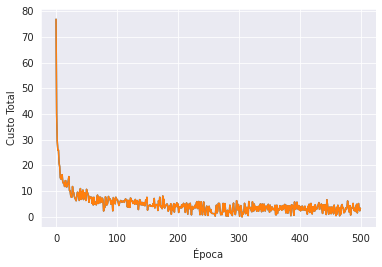

In [ ]:
w=perceptron_sgd(X,Y)
print(perceptron_sgd(X,Y))

11.53524053440655 -1.9000536702469621


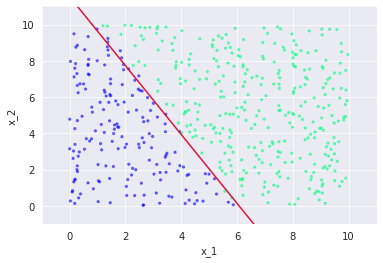

In [ ]:
fig, ax = plt.subplots()
xmin, xmax = -1, 11
ax.scatter(x1,x2,c= y, cmap = 'winter', alpha=0.5, s=5)
ax.set_xlim([xmin, xmax])
ax.set_ylim([xmin, xmax])
c = -w[2] / w[1]
m = -w[0] / w[1]
t = np.arange(xmin, xmax, 0.1)
ax.plot(t, m * t + c, color = 'crimson', label="contorno de decisão")
plt.xlabel(r'x_1')
plt.ylabel(r'x_2')
print(c,m)

## 6. Exemplo 02: Classificação e análise de performance<a class="anchor" id="6"></a>

Agora, com outros dados ainda sintéticos, vamos separar em teste e validação, utilizar a biblioteca pronta `sklearn.linear_model import Perceptron`, comparar os resultados de nossa implementação com os da biblioteca plotando os resultados.

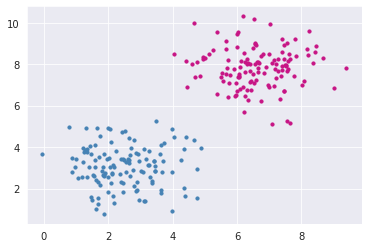

In [ ]:
from sklearn.datasets import make_blobs

n_samples = 250
x, y = make_blobs(n_samples=n_samples, 
                             centers=([2.5, 3], [6.7, 7.9]), 
                             random_state=0)
colours = ('steelblue', 'mediumvioletred')
fig, ax = plt.subplots()


for n_class in range(2):
    ax.scatter(x[y==n_class][:, 0], x[y==n_class][:, 1], 
               c=colours[n_class], s=10, label=str(n_class))

In [ ]:
#Com a biblioteca python
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

modelo = Perceptron(alpha=0.1, random_state=0)    
modelo.fit(X_train, y_train)    
y_pred = modelo.predict(X_test)
print('Total de testes:{:d}, erros:{:d}'.format(len(y_test), (y_test != y_pred).sum()))
print('Acurácia: {:3.2f}'.format(accuracy_score(y_test, y_pred)))

Total de testes:75, erros:0
Acurácia: 1.00


[  0.74532091   1.19200956 -10.        ]


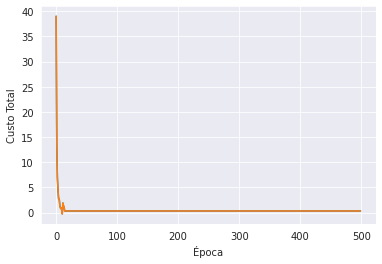

In [ ]:
# Nosso programa
X_train2 = np.insert(X_train, 2, values=1, axis=1) # Inserimos bias antes da coluna 2
y_train2 = np.where(y_train==0, -1, y_train) # Substituímos o valor 0 por -1
X_test2 = np.insert(X_test, 2, values=1, axis=1) # Inserimos bias antes da coluna 2
y_test2 = np.where(y_test==0, -1, y_test) # Substituímos o valor 0 por -1

w=perceptron_sgd(X_train2,y_train2)
print(perceptron_sgd(X_train2,y_train2))

[[1.49599303 3.98211268]]
[-28.]
9.973228504514806


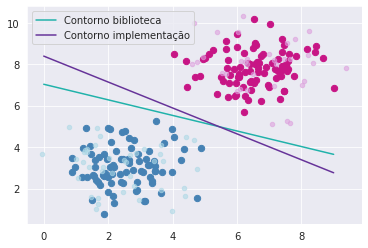

In [ ]:
fig, ax = plt.subplots()

# plotting learn data
colours = ('steelblue', 'mediumvioletred')
for n_class in range(2):
    ax.scatter(X_train[y_train==n_class][:, 0], 
               X_train[y_train==n_class][:, 1], 
               c=colours[n_class], s=40)
    
# plotting test data
colours = ('lightblue', 'plum')
for n_class in range(2):
    ax.scatter(X_test[y_test==n_class][:, 0], 
               X_test[y_test==n_class][:, 1], 
               c=colours[n_class], s=20, alpha = 0.6)

print(modelo.coef_) # coeficientes
print(modelo.intercept_)  # intercept/w0 

print(np.max(X[:]))    
t = np.arange(np.max(X[:]))
m = -modelo.coef_[0][0] / modelo.coef_[0][1]
c = -modelo.intercept_ / modelo.coef_[0][1]
ax.plot(t, m*t+c, color = 'lightseagreen', label='Contorno biblioteca' )
c = -w[2] / w[1]
m = -w[0] / w[1]
ax.plot(t, m*t+c, color = 'rebeccapurple', label='Contorno implementação' )
plt.legend()
plt.show()

Que tal você separar os dados acima usando SVM (Support Vector Machine) e K-means e colocar a separação obtida por esses modelos também no gráfico acima? Apesar de nossas aulas terem um fim, a teoria não tem!!!!

# Parte II: Modelo de Rede Neural Artificial



## 1. Estrutura das RNAs<a class="anchor" id="1."></a>

Os cérebros humanos interpretam o contexto das situações do mundo real de uma forma que os computadores não conseguem. 

Como já mencionado, a RNA é um modelo computacional vagamente inspirado no cérebro humano que consiste em uma rede interconectada de unidades de processamento simples que podem aprender com a experiência, modificando suas conexões. 

Leia o interessante texto [Neural Networks — Relation to Human Brain and Cognition](https://becominghuman.ai/neural-networks-relation-to-human-brain-and-cognition-b45575359f64). A piadinha abaixo foi extraída de lá...

![](https://drive.google.com/uc?export=view&id=1SnTWwrG0LngML7oNLHivO7HvIb3a0NNe)

A função de uma RNA é receber dados e transformá-los nas saídas desejadas. Para isso, neurônios estão dispostos em camadas sequenciais, da entrada para a saída. 

![](https://drive.google.com/uc?export=view&id=1lrK12UF7WeBaWNz4nsK52fF8TZ5gsJ7T)

Existem três tipos principais de camadas em uma RNA (vide figura acima):
* Camada de entrada, que recebe os dados de entrada que posteriormente são transformados nas saídas;
* Camadas intermediárias ou escondidas, que realizam a maior parte do processamento. Em princípio quanto maior o número de camadas intermediárias e de neurônios nessas camadas, maior a capacidade da RNA em realizar transformações complexas;
* Camada de saída, além de também realizar algum tipo de processamento, tem a função de ajustar a informação processada pela RNA ao formato desejado para as saídas, associado ao problema que se deseja resolver.

![](https://drive.google.com/uc?export=view&id=1rueBxtxqYYB9eXMPxkv_FzzfBjYAV9l_)

Como ilustra a figura, uma RNA consiste de uma grande quantidade de unidades de processamento simples (neurônios) interconectadas. Cada neurônio funciona como um *Perceptron*, recebendo sinais de dos neurônios da camada anterior e conectando-se aos neurônios da camada seguinte. 

Os neurônios somam, de forma ponderada, as entradas recebidas de outros neurônios, gerando o *estado* $z$ do neurônio, transformam esse estado através da função de ativação, e transmitem uma única saída para os neurônios da camada seguinte.

### Primeira camada

Os estados dos neurônios da primeira camada intermediária dependem das entradas da RNA, dos pesos das ligações entre esses neurônios e dos vieses dos neurônios. Por exemplo, na figura temos 3 neurônios na primeira camada, de forma que 
\begin{equation}
\begin{bmatrix}
z_1^{[1](i)}\\
z_2^{[1](i)}\\
z_3^{[1](i)}
\end{bmatrix}=
\begin{bmatrix}
w_{1,1}^{[1]} & w_{1,2}^{[1]} & w_{1,3}^{[1]}\\
w_{2,1}^{[1]} & w_{2,2}^{[1]} & w_{2,3}^{[1]}\\
w_{3,1}^{[1]} & w_{3,2}^{[1]} & w_{3,3}^{[1]}\\
\end{bmatrix}
\begin{bmatrix}
x_1^{(i)}\\
x_2^{(i)}\\
x_3^{(i)}
\end{bmatrix}+
\begin{bmatrix}
b_1^{[1]}\\
b_2^{[1]}\\
b_3^{[1]}
\end{bmatrix}
\end{equation}
onde, para um neurônio $k$ da primeira camada, $z_k^{[1](i)}$ é seu *estado*, $w_{k,j}^{[1]}$ é o peso da sua ligação com a entrada $x_j^{(i)}$ e $b_k^{[1]}$ é o seu viés. Importante você entender a nomenclatura de índices. Essa nomenclatura irá acompanhar você até o final desse Notebook.

De forma compacta,
\begin{equation}
\mathbf{z}^{[1](i)}=\mathbf{W}^{[1]}\mathbf{x}^{(i)}+\mathbf{b}^{[1]}
\end{equation}
onde $\mathbf{x}^{(i)}$ é o vetor do $i$-ésimo conjunto de dados de entrada da RNA, $\mathbf{z}^{[1](i)}$ é vetor de estados dos neurônios da primeira camada, $\mathbf{W}^{[1]}$ é a matriz de pesos das ligações dos neurônios da primeira camada e $\mathbf{b}^{[1]}$ é o vetor de vieses da primeira camada.

Cada neurônio da primeira camada passa por uma função de ativação e transmite uma única saída para muitos outros neurônios. Os níveis de ativação dos neurônios da primeira camada são definidos pelo vetor de ativações $\mathbf{a}^{[1](i)}$ ,

\begin{equation}
\begin{bmatrix}
a_1^{[1](i)}\\
a_2^{[1](i)}\\
a_3^{[1](i)}
\end{bmatrix}= g^{[1]}
\begin{bmatrix}
z_1^{[1](i)}\\
z_2^{[1](i)}\\
z_3^{[1](i)}
\end{bmatrix}
\end{equation}
onde $g^{[1]}$ é a função de ativação da primeira camada. De forma compacta,
\begin{equation}
\mathbf{a}^{[1](i)}=g^{[1]}\left(\mathbf{z}^{[1](i)}\right)
\end{equation}

### Demais camadas intermediárias

Os estados dos neurônios da camada $l$ são função das ativações dos neurônios da camada anterior  $l-1$, dos pesos das ligações entre esses neurônios e dos vieses
dos neurônios:
\begin{equation}
\mathbf{z}^{[l](i)}=\mathbf{W}^{[l]}\mathbf{a}^{[l-1](i)}+\mathbf{b}^{[l]}
\end{equation}

No exemplo da figura, para segunda camada intermediária, tem-se os estados definidos como, 
\begin{equation}
\begin{bmatrix}
z_1^{[2](i)}\\
z_2^{[2](i)}
\end{bmatrix}=
\begin{bmatrix}
w_{1,1}^{[2]} & w_{1,2}^{[2]} & w_{1,3}^{[2]}\\
w_{2,1}^{[2]} & w_{2,2}^{[2]} & w_{2,3}^{[2]}
\end{bmatrix}
\begin{bmatrix}
a_{1}^{[1](i)}\\
a_{2}^{[1](i)}\\
a_{3}^{[1](i)}
\end{bmatrix}+
\begin{bmatrix}
b_1^{[2]}\\
b_2^{[2]}
\end{bmatrix}
\end{equation}

De forma compacta,
\begin{equation}
\mathbf{z}^{[2](i)}=\mathbf{W}^{[2]}\mathbf{a}^{[1](i)}+\mathbf{b}^{[2]}
\end{equation}

Veja que as camadas não precisam ter o mesmo número de neurônios, porém, a matriz $\mathbf{W}^{[l]}$ da camada $l$ terá à dimensão de número de neurônios da camada $l$ por número de neurônios da camada $l-1$. Veja que a matriz $\mathbf{W}^{[2]}$ de nosso exemplo tem dimensão $2 \times 3$. Os vetores $\mathbf{z}^{[l](i)}, \mathbf{b}^{[l]}$ terão dimensão o número de neurônios da camada $l$, enquanto $\mathbf{a}^{[l-1](i)}$ tem a dimensão do número de neurônios da camada $l-1$.

Os níveis de ativação dos neurônios da camada $l$ são definidos pelo vetor de ativações $\mathbf{a}^{[l]}$,
\begin{equation}
\mathbf{a}^{[l](i)}=g^{[l]}\left(\mathbf{z}^{[l](i)}\right)
\end{equation}

No caso de nosso exemplo,
\begin{equation}
\begin{bmatrix}
a_1^{[2](i)}\\
a_2^{[2](i)}
\end{bmatrix}= g^{[2]}
\begin{bmatrix}
z_1^{[2](i)}\\
z_2^{[2](i)}
\end{bmatrix}
\end{equation}

Um fato importante a ser notado é que as funções de ativações das diversas camadas em geral são diferentes.

As saídas da RNA são as ativações dos neurônios da camada de saída, que nesse exemplo, é a terceria camada. Portanto, tem-se:
No caso de nosso exemplo,
\begin{equation}
\begin{bmatrix}
\hat{y}_1^{(i)}\\
\hat{y}_2^{(i)}
\end{bmatrix}= \begin{bmatrix}
a_1^{[3](i)}\\
a_2^{[3](i)}
\end{bmatrix}
\end{equation}
ou seja,
\begin{equation}
\mathbf{\hat{y}}^{(i)}=\mathbf{a}^{[L](i)}
\end{equation}
onde $L$ é a última camada.

Os cálculos realizados por uma RNA podem ser
visualizados por meio de um diagrama que representa o fluxo de dados da entrada até a saída da rede. Na figura abaixo, por brevidade, considerou-se apenas duas camadas intermediárias e o superíndice $(i)$ foi omitido do estado $z^[j]$ e da ativação $a^[j]$.

![](https://drive.google.com/uc?export=view&id=11uzXIdzXcUKEL_nbfRTRwtweNo9kfSp1)


Na figura, cada bloco representa uma equação matricial, sendo que para cada camada da RNA tem-se duas equações: uma para calcular os estados dos neurônios da camada e outra para calcular as ativações dos neurônios. É importante ressaltar que a saída de uma camada é a entrada da camada posterior, essa característica faz com que
se possa tratar as camadas de uma rede neural individualmente com suas entradas e saídas - como um conjunto de perceptrons.

## Falta muito o que aprender

Aprendemos a estrutura de uma RNA. Mas, como encontrar os pesos $w_{k,j}^{[l]}$ e os vieses $b_{k}^{[l]}$? 

Ao montar essa estratégia de treinamento iremos definir função de custo, aprender as diferentes funções de ativação, etc...

Vamos em frente...

## 2. Dados - Noisy Moon <a class="anchor" id="2."></a>

Para acompanhar o desenvolvimento de nosso conhecimento usaremos um conjunto de dados sintéticos simples que forma dois semicírculos intercalados. Esses dados são comumente usados para visualizar algoritmos de agrupamento e classificação.

Os dados são obtidos com a bilbioteca `sklearn.datasets.make_moons`.

Nesta etapa vamos plotar os dados e organizar os dados de entrada e saída da forma correta, isto é:

* **Dados de entrada** representados por uma matriz `X`, tem a dimensão número de *features* por número total de dados. Em nosso caso, geraremos artificialmente 600 conjuntos de dados, com 2 features cada. 

* **Dados de saída** representados por um vetor linha `Y`, tem a dimensão do número total de dados. Em nosso caso, geraremos artificialmente 600 respostas $1$ ou $0$. 


Para exemplificar, suponha que você está fazendo um problema de classificação de imóveis. Para isso, você dispõe de *preço* e *localização* de 600 casas vendidas. E, para cada uma delas, dependendo do tempo que a casa ficou disponível para venda, você classifica como *venda fácil* ($y=1$) ou *venda difícil* ($y=0$).

![](https://drive.google.com/uc?export=view&id=1i_kEm8BGjFOTkA9536TNb2LKw4gSK0YM)

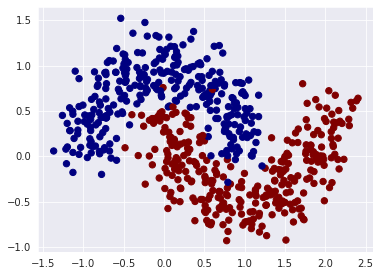

In [ ]:
# Define número de exemplos m e nível de ruído
m = 600
data = sklearn.datasets.make_moons(n_samples=m, noise=.2)

# Recupera dados de entrada e de saída do conjunto dedados
X, Y = data
X, Y = X.T, Y.reshape(1, Y.shape[0])

# Visualização dos dados
plt.figure(figsize=(6, 4.5))
plt.scatter(X[0, :], X[1, :], c=Y.ravel(), s=40, cmap='jet', norm=NoNorm())
ax = plt.axes()
plt.show()

In [ ]:
# Determina dimensões dos dados de entrada e de saída
shape_X = X.shape
shape_Y = Y.shape

# Determina número de exemplos de treinamento
m = shape_X[1] 

# Resultados
print ('A dimensão de X é: ' + str(shape_X))
print ('A dimensão de Y é: ' + str(shape_Y))
print ('Existem m = %d exemplos de treinamento' % (m))

A dimensão de X é: (2, 600)
A dimensão de Y é: (1, 600)
Existem m = 600 exemplos de treinamento


## 3. Codificação da RNA<a class="anchor" id="3."></a>


###  3.1. Definição da estrutura da RNA<a class="anchor" id="3.1."></a>

Aqui define-se o número de neurônios na camada de entrada `nx`, na camada intermediária `n1` e na camada de saída `ny`.

Veja que o algoritmo que estamos desenvolvendo aqui tem somente uma camada intermediária, e uma única saída. Generalizar o problema não traria maior conhecimento sobre RNAs, mas, complicaria bastante a implementação do algoritmo. A figura abaixo ilustra nossa rede. Entre a camada intermediária e a camada de entrada são definidos apenas alguns pesos, somente para ilustração.

![](https://drive.google.com/uc?export=view&id=1t4he9FhBS5jBDGHftzjgXzwnPOvO2afX)




In [ ]:
nx = 2 # camada de entrada
n1 = 5 # camada intermediária
ny = 1 # camada de saída

### 3.2. Inicialização dos parâmetros<a class="anchor" id="3.2."></a>

Os parâmetros desconhecidos, que são pesos e vieses, devem ser inicializados (como vimos no Perceptron).

Números aleatórios são muito utilizados em redes neurais e a biblioteca `numpy` possui diversas funções para gerar números aleatórios. A função `random.random` calcula números aleatórios com distribuição uniforme no intervalo entre $0$ e $1$.

Ao se multiplicar a função `random.random` por $0.01$, os pesos das ligações dos neurônios são inicializados com números aleatórios com distribuição uniforme no intervalo entre $0$ e
$0.01$. Os vieses dos neurônios são todos inicializados com zeros.

Antes de chamar a função `random.random` para gerar números aleatórios pela primeira vez, inicializa-se a função com o comando `np.random.seed(2)`, que garante que a função irá gerar sempre os mesmos números quando for chamada. Se a geração de números aleatórios não for inicializada, a cada vez que é utilizada gera uma sequência de números diferente.

Verifique que a matriz com os pesos da primeira camada, `W1`, tem dimensão `(n1, nx)` e da segunda camada,  `W2`, tem dimensão `(ny, n1)`. Os vetores de viés, `b1` e `b2` tem, respectivamente, dimensões `(n1, 1)` e `(ny, 1)`. O entendimento das dimensões é bastante importante para o acompanhamento da implementação do algoritmo.

In [ ]:
def inicializa_parametros(nx, n1, ny):
    """
    Argumentos:
    nx = número de entradas
    n1 = número de neurônios da camada escondida
    n = número de saídas
    
    Retorna:
    W1 = matriz de pesos de dimensão (n1, nx)
    b1 = vetor de vieses de dimensão (n1, 1)
    W2 = matriz de pesos de dimensão (ny, n1)
    b2 = vetor de vieses de dimensão (ny, 1)
    """
    
    # Define semente para geração de números aleatórios de forma a uniformizar resultados
    np.random.seed(2)
    
    # Incializa pesos das ligações com números aleatórios
    W1 = np.random.random((n1, nx)) * 0.01 
    W2 = np.random.random((ny, n1)) * 0.01 
    
    # Define vieses com zeros
    b1 = np.zeros((n1, 1))
    b2 = np.zeros((ny, 1))
    
    # Verifica se dimensões dos parâmetros é correta
    assert (W1.shape == (n1, nx))
    assert (b1.shape == (n1, 1))
    assert (W2.shape == (ny, n1))
    assert (b2.shape == (ny, 1))
    
    return (W1, b1, W2, b2)

In [ ]:
# Executa função para inicializar parâmetros
W1, b1, W2, b2 = inicializa_parametros(nx, n1, ny)

# Mostra os valores inicializados
print("W1 = ", W1)
print("b1 = ", b1)
print("W2 = ", W2)
print("b2 = ", b2)

W1 =  [[0.00435995 0.00025926]
 [0.00549662 0.00435322]
 [0.00420368 0.00330335]
 [0.00204649 0.00619271]
 [0.00299655 0.00266827]]
b1 =  [[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
W2 =  [[0.00621134 0.00529142 0.0013458  0.00513578 0.0018444 ]]
b2 =  [[0.]]


### 3.3. Propagação para frente, função de custo e retro-propagação<a class="anchor" id="3.3."></a>

A base para o entendimento do algoritmo de treinamento de uma rede neural são a propagação para frente (*forward propagation*), a função de custo (*loss function*) e a retro-propagação (*backpropagation*). 

![](https://drive.google.com/uc?export=view&id=1UDhd2YdyL-PWexPk-YyJSmaLnNd0wUzv)

Conforme vimos com a unidade Perceptron, a rede tem seu sentido de propagação, partindo dos dados de entrada, passando de camada em camada até os dados de saída. Essa é a *propagação para frente*, representada no gráfico abaixo. Durante esse caminho, a entrada em cada neurônio de uma camada, $\mathbf{z}$, é o somatório da média ponderada das saídas dos neurônios das camadas anteriores mais um viés. Depois, esse resultado passa por uma função de ativação e o resultado, $\mathbf{a}$, alimenta a camada seguinte de neurônios.  Isso já aprendemos! Os nós neste gráfico correspondem a todos os valores que são calculados para obter o erro $E$ na propagação de um conjunto de dados $i$.

![](https://drive.google.com/uc?export=view&id=1gH9oNCm0KeJTITT7tGpaI4TPAJfXmjfI)

Conforme já definimos quando estudávamos *Perceptron*, existem outras funções de ativação, como por exemplo, Sigmoide, ReLU (do inglês *rectified linear unit*), tanh, etc... Nós iremos implementar a função sigmóide, 
$$
\text{sigmoid} = g(z) = \frac{1}{1+e^{-z}}
$$
que resulta em valores entre $0$ e $1$. Atualmente, a função mais comum é a ReLU, principalmente em redes neurais convolucionais. Fica como lição para você programar a ReLU.

Com a propagação dos dados até a última camada, temos a saída $\mathbf{\hat{y}}$. 

Mas, isso basta para treinar uma rede? A resposta é não. 

Exatamente como no caso do perceptron (afinal, a rede é um conjunto de perceptrons distribuídos em camadas), os algoritmos de treinamento supervisionado das RNAs consistem de métodos de otimização de uma função de custo. A função de custo é definida para o problema que se quer resolver e, como já mencionamos, depende da diferença entre a saída desejada e a saída calculada pela RNA para cada exemplo usado no treinamento. O processo de otimização tem como objetivo calcular os parâmetros da rede, que são as matrizes de pesos das ligações $\mathbf{W}^{[l]}$ e vetores de viés $\mathbf b^{[l]}$, para todas as camadas da RNA (ou seja, $l = 1,...,L$) de forma a minimizar a função de custo $J(\mathbf{W},\mathbf{b})$.

Teoricamente, a procura pelo conjunto de parâmetros da RNA que minimiza a função de custo pode ser feito resolvendo um sistema de equações, obtido igualando a zero as derivadas parciais da função de custo em relação a todos os parâmetros da RNA. Contudo, além de ineficiente, essa solução só é possível se a RNA possuir poucos parâmetros. No caso de uma RNA de muitas camadas, ou de muitos neurônios, i.e., alguns milhões de parâmetros, esse processo direto de solução se torna impraticável. 
Assim, a solução é utilizar um processo iterativo de busca do valor mínimo da função de custo. 

Esse processo iterativo de minimização da função de custo é realizado usando as seguintes etapas:
1. Inicialização dos parâmetros da RNA;
2. Execução da RNA para todos os exemplos do conjunto de dados de treinamento, de forma
que dadas as entradas calculam-se as saídas previstas pela RNA;
3. Cálculo da função de custo para todos os exemplos de treinamento;
4. Cálculo do gradiente da função de custo em relação a todos os parâmetros da RNA;
5. Atualização dos parâmetros da RNA na direção oposta ao gradiente de forma a reduzir o valor
da função de custo;
6. Repetição das etapas 2 a 5 até a obtenção de um valor desejado para a função de custo, ou até
os parâmetros da RNA convergirem.

Esse é o *método do gradiente descendente*, que já mencionamos no estudo do Perceptron (veja a figura abaixo, um slide de nossa aula para matar saudades...). Esse método consiste no *motor* básico das RNAs. 

![](https://drive.google.com/uc?export=view&id=1ttZekHK1wDMaZJvszM09ZQnbiiGoSG7J)

A implementação do método do gradiente descendente é realizada de uma forma eficiente utilizando o algoritmo da *retro propagação*. A maneira como podemos descobrir como calcular gradientes no algoritmo de retro propagação é pensando nesta questão:

*Como podemos medir a mudança na função de custo em relação a um peso específico, viés ou ativação?*

Conforme já sabemos, a cada iteração $i$ do método do gradiente descendente são atualizados todos os parâmetros da RNA. A atualização dos parâmetros da RNA (etapa 4) é realizada de acordo com as seguintes equações:
\begin{align}
{w}_{k,j}^{[l]} &= {w}_{k,j}^{[l]} - \alpha\frac{\partial J(\mathbf{W},\mathbf{b})}{\partial {w}_{k,j}^{[l]} } \\
{b}_{k}^{[l]} &= {b}_{k}^{[l]} - \alpha\frac{\partial J(\mathbf{W},\mathbf{b})}{\partial {b}_{k}^{[l]} } 
\end{align}
para $l=1,\cdots,L$, $k=1,\cdots,n^{[l]}$ e $j=1,\cdots,n^{[l-1]} $, $\alpha$ é a taxa de aprendizado, $\frac{\partial J(\mathbf{W},\mathbf{b})}{\partial {w}_{k,j}^{[l]} }$ é a derivada parcial da função de custo em relação ao peso da ligação ${w}_{k,j}^{[l]}$  e $\frac{\partial J(\mathbf{W},\mathbf{b})}{\partial {b}_{k}^{[l]} }$ é a derivada parcial da função de custo em relação ao viés ${b}_{k}^{[l]}$, $L$ é o número total de camadas da RNA e $n^{[l]}$ é o número de neurônios da camada $l$.

O gradiente pode ser interpretado como uma medida da contribuição do peso para a perda. Portanto, quanto maior é esse gradiente (em valor absoluto), mais o peso é atualizado durante uma iteração de descida do gradiente.

A função de custo é definida por,
\begin{equation}
J\left(\mathbf{W},\mathbf{b}\right)={1 \over m} \sum\limits_{i=1}^{m} E\left(\hat{y}^{(i)},{y}^{(i)}\right)
\end{equation}
onde $E\left(\hat{y}^{(i)},{y}^{(i)}\right)$ é a função de erro genérica - por exemplo, logística ou erro médio, que já apresentamos, $m$ é o número de dados de entrada para treinamento da rede.

Precisamos retroceder na rede e atualizar os pesos e vieses. Vamos apresentar como fazer isso matematicamente. A seguir, uma equação para pesos, uma para vieses e outra para ativações. 



**Derivadas parciais**

As derivadas parciais da função de erro em relação aos parâmetros da camada de saída da RNA para o $i$-ésimo exemplo de treinamento são calculadas aplicando a regra da cadeia da derivada,
\begin{align}
 \frac{\partial E\left(\hat{y}^{(i)},{y}^{(i)}\right)}{\partial {w}_{k,j}^{[l]} } &= \frac{\partial E\left(\hat{y}^{(i)},{y}^{(i)}\right)}{\partial a_{k}^{[l](i)} } \frac{\partial a_{k}^{[l](i)}}{\partial z_{k}^{[l](i)}} \frac{\partial z_{k}^{[l](i)}}{\partial {w}_{k,j}^{[l]} } \\
 \frac{\partial E\left(\hat{y}^{(i)},{y}^{(i)}\right)}{\partial {b}_{k}^{[l]} } &= \frac{\partial E\left(\hat{y}^{(i)},{y}^{(i)}\right)}{\partial a_{k}^{[l](i)} } \frac{\partial a_{k}^{[l](i)}}{\partial z_{k}^{[l](i)}} \frac{\partial z_{k}^{[l](i)}}{\partial {b}_{k}^{[l]}} 
\end{align}

Particularmente, para última camada $L$, tem-se que,
\begin{align}
z_{k}^{[L](i)} &= {w}_{k,j}^{[L]} a^{[L-1](i)}_{k} + b^{[L]}_{k}\\
a_k^{[L](i)} &= g\left(z_{k}^{[L](i)}\right)=\hat{y}^{(i)}\\
E\left(\hat{y}^{(i)},{y}^{(i)}\right) &= \left(a_k^{[L](i)}-{y}^{(i)}\right)^2 = \left(\hat{y}^{(i)}-{y}^{(i)}\right)^2
\end{align}
usando a função erro quadrático. Dessa forma,
\begin{equation}
 \frac{\partial E\left(\hat{y}^{(i)},{y}^{(i)}\right)}{\partial {w}_{k,j}^{[L]}} = 2 \left(a_k^{[L](i)}-{y}^{(i)}\right)\frac{\partial a_k^{[L](i)}}{\partial z_k^{[L](i)}}\frac{\partial  z_k^{[L](i)}}{\partial {w}_{k,j}^{[L]}}
\end{equation}
ie,
\begin{equation}
 \frac{\partial E\left(\hat{y}^{(i)},{y}^{(i)}\right)}{\partial {w}_{k,j}^{[L]}} = 2 \left(a_k^{[L](i)}-{y}^{(i)}\right) a_k^{[L-1](i)}\frac{\partial a_k^{[L](i)}}{\partial z_k^{[L](i)}}
\end{equation}
lembrando que $\frac{\partial y^{(i)}}{\partial {w}_{k,j}^{[L]}}=0$, pois $y^{(i)}$ é um dado constante de treinamento. Além disso, utilizando-se a função de ativação sigmoide para última camada, tem-se:
$$
\frac{\partial E}{\partial {w}_{k,j}^{[L]}} = 2 a_{k}^{[L-1](i)} \left(a_k^{[L](i)}-{y}^{(i)}\right) \frac{ \exp({z_{k}^{[L](i)}})}{\left[1 + \exp({z_{k}^{[L](i)}})\right]^2}
$$

Não estamos mostrando como diferenciar neste Notebook, pois existem muitos recursos excelentes para isso. Aqui, derivamos o gradiente somente em relação à última camada ${w}_{k,j}^{[L]}$... O cálculo em relação a ${w}_{k,j}^{[L-1]}$ seria ainda mais tedioso. Portanto, tal abordagem analítica seria muito difícil de implementar para uma rede complexa. Além disso, em termos de computação, essa abordagem seria bastante ineficiente, já que não poderíamos aproveitar o fato de que os gradientes compartilham alguma definição comum, como discutiremos a seguir.

**Backpropagation**

Fazendo uso da regra da cadeia de cálculo, podemos expressar o gradiente de $E$ em relação aos pesos (ou vieses) como:
\begin{align}
 \frac{\partial E\left(\hat{y}^{(i)},{y}^{(i)}\right)}{\partial {w}_{k,j}^{[l]} } &= \frac{\partial E\left(\hat{y}^{(i)},{y}^{(i)}\right)}{\partial a_{k}^{[l](i)} } \frac{\partial a_{k}^{[l](i)}}{\partial z_{k}^{[l](i)}} \frac{\partial z_{k}^{[l](i)}}{\partial {w}_{k,j}^{[l]} } \\
 \frac{\partial E\left(\hat{y}^{(i)},{y}^{(i)}\right)}{\partial {b}_{k}^{[l]} } &= \frac{\partial E\left(\hat{y}^{(i)},{y}^{(i)}\right)}{\partial a_{k}^{[l](i)} } \frac{\partial a_{k}^{[l](i)}}{\partial z_{k}^{[l](i)}} \frac{\partial z_{k}^{[l](i)}}{\partial {b}_{k}^{[l]}} 
\end{align}

Porque *backpropagation*? Porque para calcular os pesos conectados à camada oculta imediatamente anterior à camada de saída $E$, teremos que reutilizar os cálculos anteriores. Isto é,
\begin{equation}
 \frac{\partial E\left(\hat{y}^{(i)},{y}^{(i)}\right)}{\partial {w}_{k,j}^{[L-1]} } = \frac{\partial E\left(\hat{y}^{(i)},{y}^{(i)}\right)}{\partial a_{k}^{[L-1](i)} } \frac{\partial a_{k}^{[L-1](i)}}{\partial z_{k}^{[L-1](i)}} \frac{\partial z_{k}^{[L-1](i)}}{\partial {w}_{k,j}^{[L-1]} } 
 \end{equation}

\begin{equation}
\frac{\partial E\left(\hat{y}^{(i)},{y}^{(i)}\right)}{\partial a_{k}^{[L-1](i)} }
    =
    \underbrace{
    \frac{\partial E\left(\hat{y}^{(i)},{y}^{(i)}\right)}{\partial a_k^{[L](i)}}
    \frac{\partial a_{k}^{[L](i)}}{\partial z_{k}^{[L](i)}}
    }_\text{Reutilizado de $\frac{\partial E\left(\hat{y}^{(i)},{y}^{(i)}\right)}{\partial{w}_{k,j}^{[L](i)} }$}
    \,
    \frac{\partial z_{k}^{[L](i)}}{\partial a_{k}^{[L-1](i)}}
    \frac{\partial a_{k}^{[L-1](i)}}{\partial z_{k}^{[L-1](i)}}
    \frac{\partial z_{k}^{[L-1](i)}}{\partial {w}_{k,j}^{[L-1]} }
\end{equation}

Tente entender a notação usada ligando qual camada $L-1$ com a camada $L$. Lembre-se que $i$ é a iteração, $l$ a camada, e no peso $w_{j,k}$ o índice $j$ refere-se ao número do neurônio da camada $l$ e $k$ ao número do neurônio da camada $l-1$.

![](https://drive.google.com/uc?export=view&id=1bmEn97LHTwnkfD92BAOnu6RTBHY6jjmv)

Mais que entender passagens matemáticas de derivadas parciais, o importante é entender conceitos como a propagação para frente e para trás e a lógica por trás do algoritmo. Para ajudar, vamos imaginar a nossa pequena rede, que está ilustrada no diagrama mostrado acima. Note que,
$$
\frac{\partial E}{\partial {w}_k^{[2]}} = \frac{\partial E}{\partial \hat{y}^{(i)}} \frac{\partial \hat{y}^{(i)}}{\partial {w}_k^{[2]}} = \frac{\partial E}{\partial \hat{y}^{(i)}} \frac{\partial \hat{y}^{(i)}}{\partial z^{[2](i)}}\frac{\partial z^{[2](i)}}{\partial {w}_k^{[2]}}
$$

Verifique que é possível obter a relação entre $\frac{\partial E}{\partial \mathbf{a}^{[2](i)}}=\frac{\partial E}{\partial \hat{y}^{(i)}}$ da propagação para frente. Dada a função de custo $E\left(\hat{y}^{(i)},{y}^{(i)}\right) $, as demais derivadas parciais dependem de relações conhecidas,
\begin{align}
{a}^{[2](i)} &= g\left(z^{[2](i)}\right)\\
z^{[2](i)} &= \mathbf{w}^{[2]} \cdot \mathbf{a}^{[1](i)} + b^{[2]}_{k}\\
\end{align}
(veja que ${a}^{[2](i)}$ não tem subíndice $k$ porque é unidimensional).

O mesmo vale para $\mathbf{W}^{[1]}$,
$$
 \frac{\partial E}{\partial w_{k,j}^{[1]}} = \frac{\partial E}{\partial {a}^{[2](i)}} \frac{\partial {a}^{[2](i)}}{\partial w_{k,j}^{[1]}} = \frac{\partial E}{\partial {a}^{[2](i)}} \frac{\partial {a}^{[2](i)}}{\partial z^{[2](i)}} \frac{\partial z^{[2](i)}}{\partial w_{k,j}^{[1]}} = \frac{\partial E}{\partial {a}^{[2](i)}} \frac{\partial {a}^{[2](i)}}{\partial z^{[2](i)}} \frac{\partial z^{[2](i)}}{\partial {a}^{[1](i)}_k} \frac{\partial {a}^{[1]}_k}{\partial w_{k,j}^{[1]}} = \frac{\partial E}{\partial {a}^{[2](i)}} \frac{\partial {a}^{[2](i)}}{\partial z^{[2](i)}} \frac{\partial z^{[2](i)}}{\partial {a}^{[1](i)}_k} \frac{\partial {a}^{[1](i)}_k}{\partial z^{[1](i)}_k} \frac{\partial z^{[1](i)}_k}{\partial w_{k,j}^{[1]}}
 $$

Uma coisa muito importante a notar aqui é que a solução do gradiente $\frac{\partial E}{\partial w_{k,j}^{[1]}}$ pode reutilizar alguns dos cálculos realizados durante a avaliação do gradiente $\frac{\partial E}{\partial w_{k}^{[2]}}$. Obviamente, tudo se aplica na solução para o gradiente $\frac{\partial E}{\partial b^{[1]}_k}$:
$$
\frac{\partial E}{\partial b^{[1]}_k} = \frac{\partial E}{\partial a^{[2](i)}} \frac{\partial a^{[2](i)}}{\partial z^{[2](i)}} \frac{\partial z^{[2](i)}}{\partial a^{[1](i)}_k} \frac{\partial a^{[1](i)}_k}{\partial z^{[1](i)}_k} \frac{\partial z^{[1](i)}_k}{\partial b^{[1]}_k}
$$
e vemos que os primeiros quatro termos do lado direito da equação são iguais aos de $\frac{\partial E}{\partial w_{k}^{[2]}}$.

Na prática, uma iteração de gradiente descendente exigiria agora uma passagem para a frente e apenas uma passagem na direção reversa, computando todas as derivadas parciais a partir do nó de saída. No [artigo original sobre retropropagação](http://www.cs.toronto.edu/~hinton/absps/naturebp.pdf) publicado em 1986, os autores (entre os quais Geoffrey Hinton - se você quiser assistir uma aula dele use esse [link](https://www.youtube.com/watch?v=bO9nHq2AqbQ)) usaram a retropropagação pela primeira vez para permitir que unidades internas ocultas aprendessem características do domínio do problema.

Para visualizar melhor o que é retropropagação na prática, vamos implementar um problema de classificação de rede neural em `numpy`. Dessa forma, tudo ficará mais claro.

Na verdade, como veremos a seguir, não há necessidade de uma biblioteca complexa de aprendizado profundo para brincar com sua primeira rede neural.

#### Propagação para frente
Para codificar as equações de propagação para frente, 
\begin{align}
\mathbf z^{[1](i)} &=\mathbf{W}^{[1]}\mathbf{x}^{(i)}+\mathbf{b}^{[1]} \\
\mathbf{a}^{[1](i)} &= g^{[1]}(\mathbf{z}^{[1](i)})\\
{z}^{[2](i)} &= \mathbf{w}^{[2]}\mathbf{a}^{[1](i)}+{b}^{[2]}\\
{a}^{[2](i)} &= g^{[2]}({z}^{[2](i)})
\end{align}
inicialmente são definidas a função `sigmoid`, que é
a função de ativação sigmoide usada nesse exemplo, e a função `propagacao_frente`, que implementa as equações do neurônio.

In [ ]:
# Define função sigmoide
def sigmoid(x):
    """
    Compute the sigmoid of x

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(x)
    """
    s = 1/(1+np.exp(-x))
    return s

# Define função propagacao_frente
def propagacao_frente(x, W1, b1, W2, b2):
    """
    Argumentos:
    x = dados de entrada de um exemplo com dimensão (nx, 1)
    W1 = matriz de pesos de dimensão (n1, nx)
    b1 = vetor de vieses de dimensão (n1, 1)
    W2 = matriz de pesos de dimensão (ny, n1)
    b2 = vetor de vieses de dimensão (ny, 1)
    
    Retorna:
    z1 = estados dos neurônios da camada intermediária de dimensão (n1, 1)
    a1 = ativações dos neurônios da camada intermediária de dimensão (n1, 1)
    z2 = estado do neurônio da camada de saída de dimensão (ny ,1)
    a2 = ativação do neurônio da camada de saída (saída da rede) de dimensão (ny ,1)
    """
    # Garante que dimensões dos dados de entrada são de fato um vetor de nx linhas e uma coluna
    nx = x.shape[0]
    x = np.reshape(x, (nx, 1))
    
    # Implementa propagação para frente para calcula a2 (verifique com cuidado as dimensões nas multiplicações)
    z1 = np.dot(W1,x) + b1
    a1 = np.tanh(z1) 
    z2 = np.dot(W2,a1) + b2
    a2 = sigmoid(z2)
    
    # Verifica dimensão de a2
    assert(a2.shape == (1, x.shape[1]))
    
    return (z1, a1, z2, a2)

In [ ]:
# Executa função propagacao_frente
z1, a1, z2, a2 = propagacao_frente(X[:,0], W1, b1, W2, b2)

# Resultados
print('z1 =', z1)
print('a1 =', a1)
print('z2 =', z2)
print('a2 =', a2)

z1 = [[9.35854485e-05]
 [2.39285763e-03]
 [1.81537083e-03]
 [3.47401361e-03]
 [1.47120243e-03]]
a1 = [[9.35854482e-05]
 [2.39285307e-03]
 [1.81536883e-03]
 [3.47399963e-03]
 [1.47120137e-03]]
z2 = [[3.624119e-05]]
a2 = [[0.50000906]]


#### Função de erro ####

Anteriormente, para simplificar, usamos o erro quadrático como uma função de perda. Acontece que, para um problema de classificação, essa não é uma escolha apropriada como função de perda. Na verdade, o erro quadrático não é capaz de distinguir previsões ruins de previsões extremamente ruins em um contexto de classificação. 

Aqui, como uma função de erro, preferimos usar a função de entropia cruzada,
\begin{equation}
 L(\hat{y}, y) =  -y^{(i)} \log(\hat{y}^{(i)}) - (1-y^{(i)}) \log(1-\hat{y}^{(i)})
\end{equation}
de forma que a função de custo fica definida como:
\begin{equation}
 J(\hat{y}, y) = \frac{1}{m} \sum_{i=1}^{m}\left[ -y^{(i)} \log(\hat{y}^{(i)}) - (1-y^{(i)}) \log(1-\hat{y}^{(i)}]\right)
\end{equation}
onde $y^{(i)}$ é a saída da propagação para frente de um único ponto de dados $i$,
$$\mathbf{x^{(i)}} = \begin{bmatrix} x^{(i)}_1 \\ x^{(i)}_2 \\ \end{bmatrix}
$$
e $y^{(i)}$ a classe correta do ponto de dados.

Na função abaixo, definimos a função erro em `logistica`.



In [ ]:
def logistica(a2, y):
    """
    Argumentos:
    a2 = saída da RNA (escalar)
    y = classe real do exemplo (escalar)
    
    Retorna:
    erro = função logística
    """
    
    # Calcula erro
    erro = -(y*np.log(a2) + (1 - y)*np.log(1 - a2))
    
    # Acerta número de eixos se for necessário
    erro = np.squeeze(erro)

    return erro

In [ ]:
print("Erro = " + str(logistica(a2, Y[0][0])))

Erro = 0.693129060129141


#### Retro-propagação ####

A formulação para implementação da retro-propagação está listada a seguir.
\begin{align}
\frac{\partial  L(\hat{y}^{(i)}, y^{(i)})}{\partial z^{[2](i)}} &= \frac{\partial  L(\hat{y}^{(i)}, y^{(i)})}{\partial a^{[2](i)}}\frac{\partial a^{[2](i)}}{\partial z^{[2](i)}}\\
d b^{[2](i)} &=\frac{\partial  L(\hat{y}^{(i)}, y^{(i)})}{\partial z^{[2](i)}}\frac{\partial z^{[2](i)}}{\partial b^{[2](i)}} = \frac{\partial  L(\hat{y}^{(i)}, y^{(i)})}{\partial z^{[2](i)}}\\
d \mathbf{w}^{[2](i)} &=\frac{\partial  L(\hat{y}^{(i)}, y^{(i)})}{\partial z^{[2](i)}}\frac{\partial z^{[2](i)}}{\partial \mathbf{w}^{[2](i)}}= \frac{\partial  L(\hat{y}^{(i)}, y^{(i)})}{\partial z^{[2](i)}}{\mathbf{a}^{[1](i)}}^T\\
d \mathbf{a}^{[1](i)} &=\frac{d {\sigma}^{[1]}\left(\mathbf{z}^{[1](i)}\right)}{d\mathbf{z}^{[1](i)}}=1-\left[\sigma^{[1]}\left(\mathbf{z}^{[1](i)}\right)\right]^2 = 1-\left[\mathbf{a}^{[1](i)}\right]^2\\
d\mathbf z^{[1](i)} &= \frac{\partial  L(\hat{y}^{(i)}, y^{(i)})}{\partial z^{[2](i)}}\frac{\partial z^{[2](i)}}{\partial \mathbf{a}^{[1](i)}}\frac{\partial \mathbf{a}^{[1](i)}}{\partial \mathbf z^{[1](i)}}
= \frac{\partial  L(\hat{y}^{(i)}, y^{(i)})}{\partial z^{[2](i)}}\mathbf{w}^{[2](i)} d \boldsymbol{\sigma}^{[1](i)} \\
d b^{[1](i)} &= d\mathbf z^{[1](i)}\\
d \mathbf{w}^{[1](i)} &=d\mathbf z^{[1](i)} {\mathbf{x}^{(i)}}^T\\
\frac{\partial J}{\partial \mathbf{w}^{[2]}} &+={1\over m}d \mathbf{w}^{[2](i)} \\
\frac{\partial J}{\partial b^{[2]}} &+={1\over m} db^{[2](i)} \\
\frac{\partial J}{\partial \mathbf{w}^{[1]}} &+={1\over m}d \mathbf{w}^{[1](i)} \\
\frac{\partial J}{\partial \mathbf{b}^{[1]}} &+={1\over m}d \mathbf{b}^{[1](i)} \\
\end{align}

Dada a função de erro definida anteriormente e a sigmoide como função de ativação da segunda camada, tem-se
\begin{align}
\frac{\partial  L(\hat{y}^{(i)}, y^{(i)})}{\partial z^{[2](i)}} &= \frac{\partial  L(\hat{y}^{(i)}, y^{(i)})}{\partial a^{[2](i)}}\frac{\partial a^{[2](i)}}{\partial z^{[2](i)}}\\
\frac{\partial  L(\hat{y}^{(i)}, y^{(i)})}{\partial a^{[2](i)}}&= \frac{\hat{y}^{(i)}-y^{(i)}}{\hat{y}^{(i)}(1-\hat{y}^{(i)})} \\ 
\frac{\partial a^{[2](i)}}{\partial z^{[2](i)}} &= \sigma(z^{[2](i)})(1-\sigma(z^{[2](i)})=\hat{y}^{(i)}\left( 1-\hat{y}^{(i)}\right)
\end{align}

Portanto,
\begin{equation}
\frac{\partial  L(\hat{y}^{(i)}, y^{(i)})}{\partial z^{[2](i)}} = \frac{\hat{y}^{(i)}-y^{(i)}}{\hat{y}^{(i)}(1-\hat{y}^{(i)})}\hat{y}^{(i)}\left( 1-\hat{y}^{(i)}\right)=\hat{y}^{(i)}-y^{(i)}
\end{equation}

Verifique que as derivadas não são desenvolvidas aqui. Algumas são simples. Por exemplo, para achar a derivada da função de erro $L(\hat{y}^{(i)}, y^{(i)})$ em função da previsão $a^{[2](i)}=\hat{y}^{(i)}$ usa-se a propriedade de derivada:
$$
\frac{d}{dx}\ln[f(x)] = \frac{1}{f(x)}\frac{d}{dx}f(x)
$$

Para primeira camada, a função de ativação é a tangente hiperbólica, cuja derivada é $\frac{d \tanh(x)}{dx}$. Essa expressão foi usada na derivação da equação de $d \mathbf{a}^{[1](i)}$.

A derivada da sigmoide é detalhada neste [link](https://towardsdatascience.com/derivative-of-the-sigmoid-function-536880cf918e).

In [ ]:
def retro_propagacao(x, y, z1, a1, z2, a2, W2):
    """
    Argumentos:
    x = entrada de um exemplo, dimensão (nx, 1)
    y = saída da classe real de um exemplo (escalar)
    z1 = estados dos neurônios da camada intermediária, dimensão (n1, 1)
    a1 = ativações dos neurônios da camada intermediária, dimensão (n1, 1)
    z2 = estado do neurônio da camada de saída, dimensão (ny ,1)
    a2 = ativação do neurônio da camada de saída, dimensão (ny ,1)
    W2 = matriz de pesos da camada de saída, dimensão (ny, n1)
    
    Retorna: derivadas parciais da função de erro logística em relação:
    dW1 = aos pesos das ligações da 1a camada, dimensão (n1, nx)
    db1 = aos vieses da primeira camada, dimensão (n1, 1)
    dW2 = aos pesos das ligações da camada de saída, dimensão (ny, n1)
    db2 = aos vieses da camada de saída, dimensão (ny, 1)
    """
        
    # Garante que dimensões de x estão corretas
    nx = x.shape[0]
    x = np.reshape(x, (nx, 1))
    
    # Retro-propagação: cálculo de dW1, db1, dW2, db2. 
    dz2 = a2 - y
    dW2 = np.dot(dz2,a1.T)
    db2 = dz2
    da1 = (1 - np.power(a1, 2))
    dz1 = np.dot(W2.T,dz2)*da1
    dW1 = np.dot(dz1,x.T)
    db1 = dz1
    
    return dW1, db1, dW2, db2

In [ ]:
# Executa função retro_propagacao
dW1, db1, dW2, db2 = retro_propagacao(X[:,0], Y[0][0], z1, a1, z2, a2, W2)

# Resultados
print ("dW1 = ", dW1)
print ("db1 = ", db1)
print ("dW2 = ", dW2)
print ("db2 = ", db2)

dW1 =  [[ 3.76781752e-05 -1.75465181e-03]
 [ 3.20977437e-05 -1.49477419e-03]
 [ 8.16363531e-06 -3.80175987e-04]
 [ 3.11534359e-05 -1.45079830e-03]
 [ 1.11881566e-05 -5.21026273e-04]]
db1 =  [[-0.00310561]
 [-0.00264565]
 [-0.00067289]
 [-0.00256781]
 [-0.00092218]]
dW2 =  [[-4.67918762e-05 -1.19640485e-03 -9.07667969e-04 -1.73696834e-03
  -7.35587356e-04]]
db2 =  [[-0.49999094]]


### 3.4. Atualização dos parâmetros<a class="anchor" id="3.4."></a>

Os pesos e vieses são atualizados de acordo com,
\begin{align}
\mathbf{w}^{[2]} &=\mathbf{w}^{[2]} -\alpha \frac{\partial J}{\partial \mathbf{w}^{[2]}}\\
b^{[2]} &= b^{[2]}-\alpha \frac{\partial J}{\partial b^{[2]}}\\
\mathbf{w}^{[1]} &= \mathbf{w}^{[1]} -\alpha \frac{\partial J}{\partial \mathbf{w}^{[1]}}\\
\mathbf{b}^{[1]} &=\mathbf{b}^{[1]} - \alpha \frac{\partial J}{\partial \mathbf{b}^{[1]}} \\
\end{align}

In [ ]:
def atualiza_parametros(W1, b1, W2, b2, dJdW1, dJdb1, dJdW2, dJdb2, taxa_aprendizado=1.0):
    """
    Argumentos:
    W1 = matriz de pesos de dimensão (n1, nx)
    b1 = vetor de vieses de dimensão (n1, 1)
    W2 = matriz de pesos de dimensão (ny, n1)
    b2 = vetor de vieses de dimensão (ny, 1)
    dJdW1 = matriz de gradientes dos pesos para todos exemplos, dimensão (n1, nx)
    dJdb1 = vetor de gradientes dos vieses para todos exemplos, dimensão (n1, 1)
    dJdW2 = matriz de gradientes dos pesos para todos exemplos, dimensão (ny, n1)
    dJdb2 = vetor de gradientes dos vieses para todos exemplos, dimensão (ny, 1)
        
    Retorna parametros atualizados:
    W1 = matriz de pesos de dimensão (n1, nx)
    b1 = vetor de vieses de dimensão (n1, 1)
    W2 = matriz de pesos de dimensão (ny, n1)
    b2 = vetor de vieses de dimensão (ny, 1)
    """

    # Atualização dos parâmetros
    W1 = W1 - taxa_aprendizado*dJdW1
    b1 = b1 - taxa_aprendizado*dJdb1
    W2 = W2 - taxa_aprendizado*dJdW2
    b2 = b2 - taxa_aprendizado*dJdb2
 
    return W1, b1, W2, b2

In [ ]:
# Nesse momento são utilizados os gradientes dos parâmetros para um único exemplo, somente 
# para poder testar a função atualiza_parametros
dJdW1 = dW1
dJdb1 = db1
dJdW2 = dW2
dJdb2 = db2

# Executa função atualiza_parametros
W1_n, b1_n, W2_n, b2_n = atualiza_parametros(W1, b1, W2, b2, dJdW1, dJdb1, dJdW2, dJdb2, taxa_aprendizado=0.8) 

# Resultados
print("W1 = ", W1_n)
print("b1 = ", b1_n)
print("W2 = ", W2_n)
print("b2 = ", b2_n)

W1 =  [[0.00432981 0.00166298]
 [0.00547095 0.00554904]
 [0.00419715 0.00360749]
 [0.00202156 0.00735335]
 [0.0029876  0.00308509]]
b1 =  [[0.00248449]
 [0.00211652]
 [0.00053831]
 [0.00205425]
 [0.00073774]]
W2 =  [[0.00624877 0.00624854 0.00207193 0.00652536 0.00243287]]
b2 =  [[0.39999275]]


### 3.5. Integração das tarefas 3.1 a 3.4 na função rna() <a class="anchor" id="3.5."></a>

Agora vamos unir todo conhecimento e gerar uma única função `rna` que usaremos no treinamento da RNA.

In [ ]:
def rna(X, Y, n1, num_epocas = 10000, tx_aprendizado=1.0, print_custo=False):
    """
    Argumentos:
    X = matriz de dados de entrada, dimensão (2, número de exemplos)
    Y = vetor com as classes dos exemplos, dimensão (1, número de exemplos)
    n1 = número de neurônios da camada intermediária
    num_epocas = número de épocas
    tx_aprendizado = taxa de aprendizado
    print_custo = se for True, imprime o valor do custo a cada 200 épocas
    
    Retorna parâmetros calculados no treinamento:
    W1 = matriz de pesos, dimensão (n1, nx)
    b1 = vetor de vieses, dimensão (n1, 1)
    W2 = matriz de pesos, dimensão (ny, n1)
    b2 = vetor de vieses, dimensão (ny, 1)
    """
    
    # Determina automaticamente número de entradas, saídas e exemplos
    nx = X.shape[0]
    ny = Y.shape[0]
    m = X.shape[1]
    
    # Inicializa parâmetros
    W1, b1, W2, b2 = inicializa_parametros(nx, n1, ny)
    
    # Iteração nas épocas 
    for e in range(num_epocas):

        # Inicializa os gradientes dos parâmetros com zeros
        dJdW1 = np.zeros((n1, nx))
        dJdb1 = np.zeros((n1, 1))
        dJdW2 = np.zeros((ny, n1))
        dJdb2 = 0
        
        # Incializa função de custo
        custo = 0
        
        # Iteração nos exemplos
        for i in range(m):
            # Propagação para frente
            z1, a1, z2, a2 = propagacao_frente(X[:,i], W1, b1, W2, b2)
            
            # Calcula erro usando a função logistica
            erro = logistica(a2, Y[0][i])
                     
            # Atualiza função de custo somando o erro do exemplo "i" e dividindo pelo número total de exemplos "m"
            custo += erro/m
 
            # Retro-propagação
            dW1, db1, dW2, db2 = retro_propagacao(X[:,i], Y[0][i], z1, a1, z2, a2, W2)
            
            # Acumula os gradientes de cada exemplo em dJdpar dividindo pelo numero de exemplos 
            dJdW1 += dW1/m
            dJdb1 += db1/m
            dJdW2 += dW2/m
            dJdb2 += db2/m
 
        # Atualização dos parâmetros. Entradas: "parameters, dJ". Saídas: "parameters".
        W1, b1, W2, b2 = atualiza_parametros(W1, b1, W2, b2, dJdW1, dJdb1, dJdW2, dJdb2, tx_aprendizado) 
        
        # Impressão da função de custo a cada 200 épocas
        if print_custo and e % 200 == 0:
            print ("Custo após época %i: %f" %(e, custo))
 
    return W1, b1, W2, b2

In [ ]:
# Execução da função rna para terinar a rede
W1, b1, W2, b2 = rna(X, Y, 4, num_epocas=1, tx_aprendizado=0.8, print_custo=True)

# Resultados
print("W1 = ", W1)
print("b1 = ", b1)
print("W2 = ", W2)
print("b2 = ", b2)

Custo após época 0: 0.693144
W1 =  [[ 0.00495283 -0.00020487]
 [ 0.00602455  0.00393995]
 [ 0.00543264  0.00234129]
 [ 0.00309347  0.00537315]]
b1 =  [[-3.86759179e-08]
 [-3.31471781e-08]
 [-6.96703901e-08]
 [-3.49038078e-08]]
W2 =  [[0.00381906 0.00308158 0.00653144 0.00473718]]
b2 =  [[-9.47214281e-06]]


## 4. Treinamento e teste da RNA<a class="anchor" id="4."></a>

### 4.1. Previsão das saídas<a class="anchor" id="4.1."></a>

In [ ]:
def previsao(W1, b1, W2, b2, X):
    """
    Argumentos:
    W1 = matriz de pesos, dimensão (n1, nx)
    b1 = vetor de vieses, dimensão (n1, 1)
    W2 = matriz de pesos, dimensão (ny, n1)
    b2 = vetor de vieses, dimensão (ny, 1) 
    X = matriz de entradas, dimensão (nx, m)
    
    Retorna
    Classe = vetor de classes previstas (0 / 1)
    prob = saída entre 0-1, probabilidade de previsão da classe
    """

    # Incicliza vetor de previsões para os m exemplos 
    m = X.shape[1]
    classes = np.zeros((m, 1))
    prob = np.zeros((m, 1))

    # Calcula as probabilidades usando a propagação para frente e 
    # classifica como 0/1 usando um limiar de 0,5.
    for i in range(m):
        # Calcula a propagação para frente iusando a função propagacao_frente
        z1, a1, z2, a2 = propagacao_frente(X[:,i], W1, b1, W2, b2)
        
        # Calcule a classe prevista pela rede usando o limiar de 0,5
        classes[i] = np.around(a2)
        prob[i]= a2
    
    return classes,prob

In [ ]:
#parameters, X_assess = predict_test_case()

previsoes,prob = previsao(W1, b1, W2, b2, X)
print("Média das previsões = " + str(np.mean(previsoes)))

Média das previsões = 0.745


### 4.2. Treinamento da RNA<a class="anchor" id="4.2."></a>

In [ ]:
# Treinamento e excecução da rede neural de uma única camada
W1, b1, W2, b2 = rna(X, Y, n1 = 5, num_epocas = 3001, tx_aprendizado=0.8, print_custo=True)

Custo após época 0: 0.693141
Custo após época 200: 0.298199
Custo após época 400: 0.297180
Custo após época 600: 0.296411
Custo após época 800: 0.295299
Custo após época 1000: 0.285574
Custo após época 1200: 0.165606
Custo após época 1400: 0.113032
Custo após época 1600: 0.099496
Custo após época 1800: 0.095220
Custo após época 2000: 0.093180
Custo após época 2200: 0.091698
Custo após época 2400: 0.090386
Custo após época 2600: 0.089191
Custo após época 2800: 0.088138
Custo após época 3000: 0.087244


In [ ]:
# Cálculo das classes previstas
previsoes,prob = previsao(W1, b1, W2, b2, X)

print('Classes reais, previstas pela RNA e a probabilidade (10 primeiros exemplos)')
for i in range(10):
    print('{:2d}, {:2d}, {:2.4f}'.format(int(Y[0,i]),int(previsoes[i,0]),prob[i,0]))

# Verifica porcentagem de erro
erro = np.mean(np.abs(Y.T - previsoes))
percento = 100*(1 - erro)
print("Porcentagem de classes previstas corretamente =", percento)

Classes reais, previstas pela RNA e a probabilidade (10 primeiros exemplos)
 1,  1, 0.8892
 1,  1, 0.9987
 1,  1, 0.9993
 1,  1, 0.6047
 1,  1, 0.9988
 0,  0, 0.0022
 0,  0, 0.0003
 0,  0, 0.0118
 0,  0, 0.0000
 1,  1, 0.9914
Porcentagem de classes previstas corretamente = 97.5


### 4.3. Resultados<a class="anchor" id="4.3."></a>

Na apresentação dos resultados, a *fronteira de decisão* é definida através dos valores de $a_2$, e não somente da resposta $0$ ou $1$. Dessa maneira, é possível visualizar a zona de transição da fronteira. Mude o número de épocas e perceba as mudanças da fronteira.

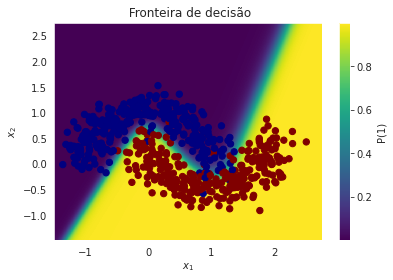

In [ ]:
def visualization(title, superposed_training=False,  **kargs):
    # Recupera dados de entrada da função
    X = kargs["X"]
    Y = kargs["Y"]
    W1 = kargs["W1"]
    b1 = kargs["b1"]
    W2 = kargs["W2"]
    b2 = kargs["b2"]
    N_test_points = 1000
    xs = np.linspace(1.1*np.min(X), 1.1*np.max(X), N_test_points)
    datapoints = np.transpose([np.tile(xs, len(xs)), np.repeat(xs, len(xs))])

    Y_initial=[]
    for i in range(len(datapoints)):
      y = propagacao_frente(datapoints[i,:], W1, b1, W2, b2)[3]
      Y_initial.append(y)
    Y_initial = np.array(Y_initial).reshape(N_test_points, N_test_points)
    X1, X2 = np.meshgrid(xs, xs)
    plt.pcolormesh(X1, X2, Y_initial, cmap='viridis')
    plt.colorbar(label='P(1)')
    if superposed_training:
      plt.scatter(X[0, :], X[1, :], c=Y.ravel(), s=40, cmap='jet', norm=NoNorm())
    plt.ylabel(r'$x_2$')
    plt.xlabel(r'$x_1$')
    plt.title(title)
    plt.show()
visualization(' Fronteira de decisão', superposed_training=True, X=X, Y=Y.ravel(), W1=W1, b1=b1, W2=W2, b2=b2)

In [ ]:
# Calcula das previsões da rede usando a função previsao
previsoes, prob = previsao(W1, b1, W2, b2, X)

# Calculo da exatidão obtida pela rede
exatidao = 100*(1 - np.sum(np.abs(Y-previsoes.T))/m)

print('Exatidão: ' + str(exatidao) + ' %')

Exatidão: 97.5 %


**Saída esperada**: 

    Exatidão: 97.5 %

### 4.4. Ajuste do número de neurônios da camada escondida<a class="anchor" id="4.4."></a>

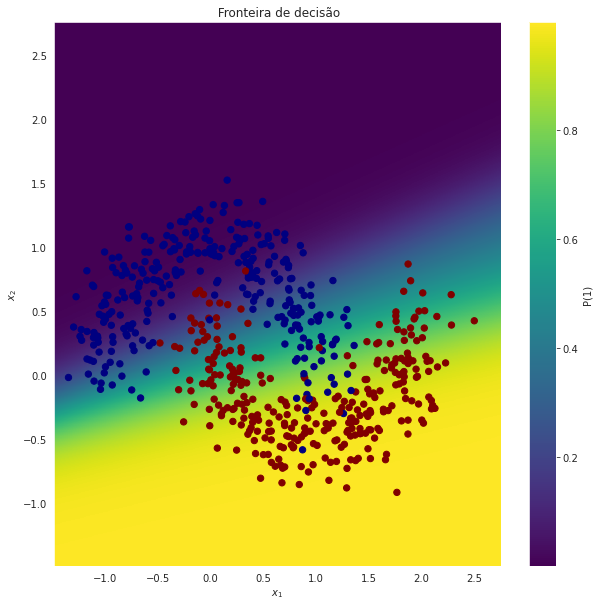

Exatidão para  2 neurônios: 88.33


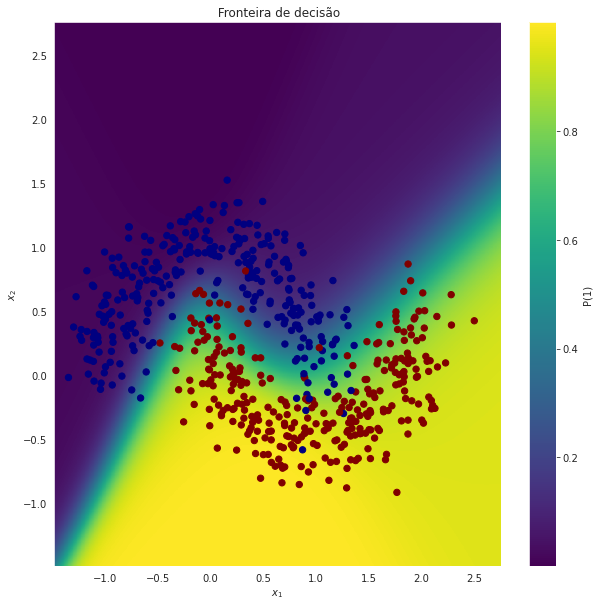

Exatidão para  3 neurônios: 94.50


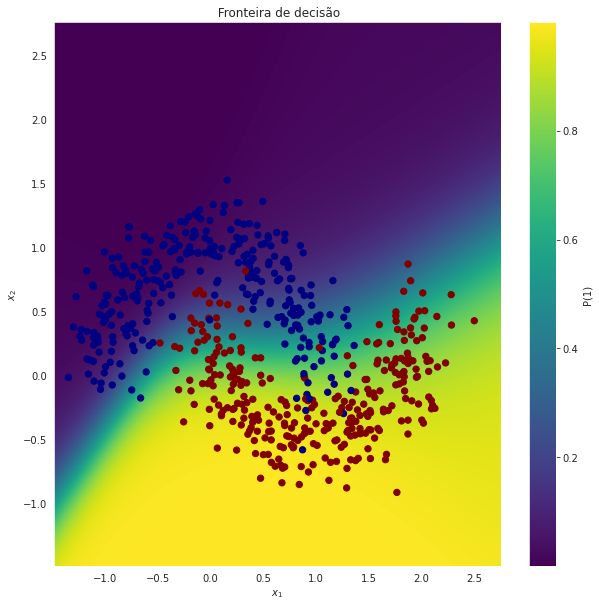

Exatidão para  4 neurônios: 90.17


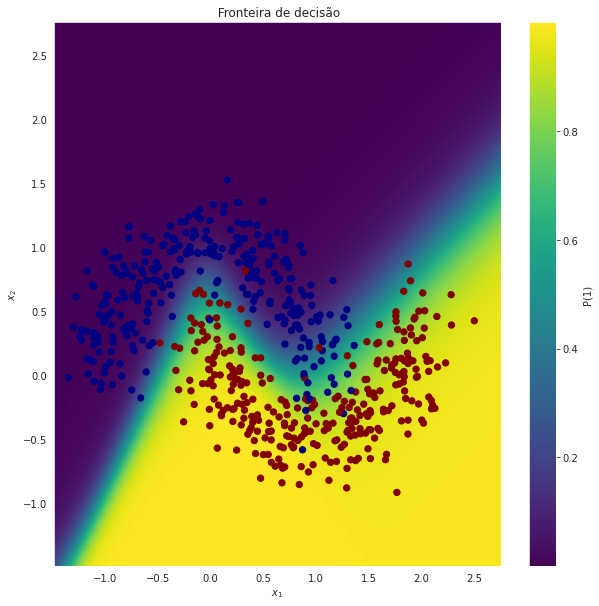

Exatidão para  5 neurônios: 95.50


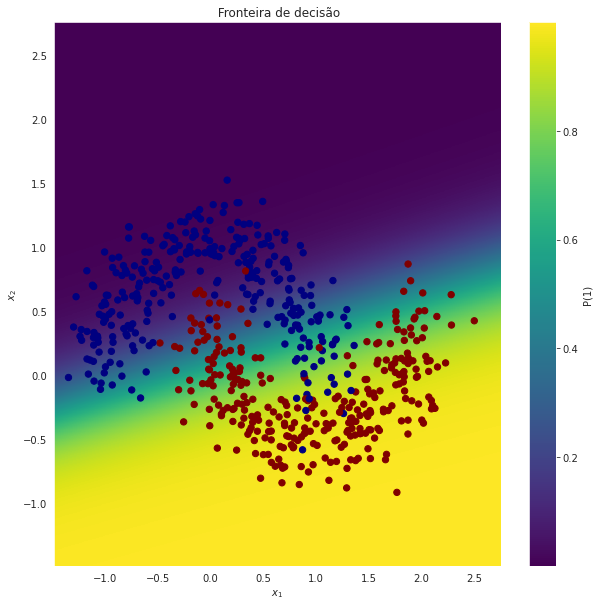

Exatidão para 20 neurônios: 88.00


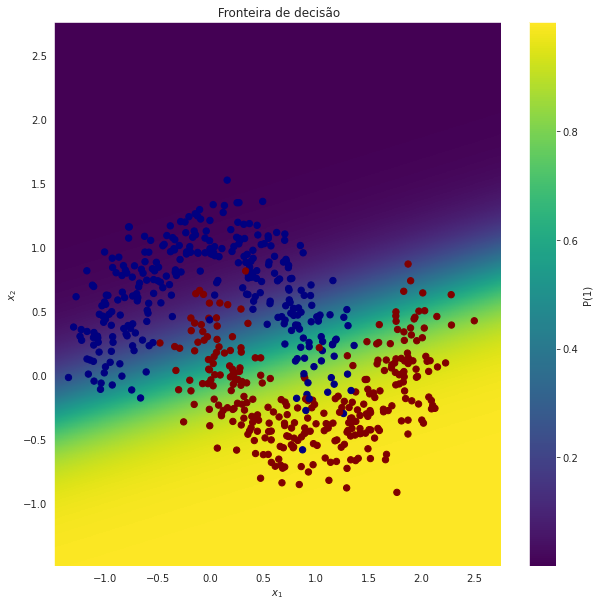

Exatidão para 50 neurônios: 87.67


In [ ]:
hidden_layer_sizes = [2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    fig = plt.figure(figsize=(10,10))
    plt.title('Numero de neurônios = %d' % n_h)
    W1, b1, W2, b2 = rna(X, Y, n_h, num_epocas = 1000)
    visualization(' Fronteira de decisão', superposed_training=True, X=X, Y=Y.ravel(), W1=W1, b1=b1, W2=W2, b2=b2)
    previsoes, prob = previsao(W1, b1, W2, b2, X)
# Calculo da exatidão obtida pela rede
    exatidao = 100*(1 - np.sum(np.abs(Y-previsoes.T))/m)
    print ('Exatidão para {:2d} neurônios: {:3.2f}'.format(n_h, exatidao))
plt.show()

### 4.5. Desempenho com outros padrões de dados<a class="anchor" id="4.5."></a>

Agora é sua lição de casa. Você irá treinar e verificar o desempenho da rede com outros padrões de dados.

Abaixo são gerados 4 padrões diferentes. Gere você também algum padrão.

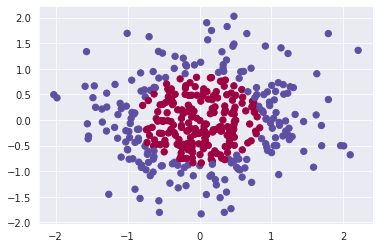

In [ ]:
# 
def load_extra_datasets():
    N = 400
    noisy_circles = sklearn.datasets.make_circles(n_samples=N, factor=.5, noise=.2)
    noisy_moons = sklearn.datasets.make_moons(n_samples=N, noise=.2)
    blobs = sklearn.datasets.make_blobs(n_samples=N, random_state=3, n_features=2, centers=5)
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.5, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)


    return noisy_circles, noisy_moons, blobs, gaussian_quantiles

# Conjunto de dados
noisy_circles, noisy_moons, blobs, gaussian_quantiles = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}


dataset = "gaussian_quantiles"

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# Tornar os dados 'blobs'  binários
if dataset == "blobs":
    Y = Y%2

# Visualização dos dados
plt.scatter(X[0, :], X[1, :], c=Y.ravel(), s=40, cmap=plt.cm.Spectral)



Duplo-clique __aqui__ para a solução.

<!-- 
# Número de neurônios da camada escondida
n_h = 5
W1, b1, W2, b2 = rna(X, Y, n_h, num_epocas = 2001)
plot_decision_boundary(previsao, X=X, Y=Y.ravel(), W1=W1, b1=b1, W2=W2, b2=b2)
previsoes,prob = previsao(W1, b1, W2, b2, X)
exatidao = 100*(1-np.sum(np.abs(Y-previsoes.T))/float(Y.size))

print ("Exatidão para {} neurônios: {} %".format(n_h, exatidao))
-->



![](https://drive.google.com/uc?export=view&id=18x33cN92SMeNmr58ymcYr-PoEw5xcRA7)